In [ ]:
#Housekeeping
import numpy as np
import pandas as pd
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy as scipy
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import os
import json
import pandas
import numpy
import optparse
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)



<ipython-input-1-bcced1a22711>:30: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/MSCA_Machine_Learning/used_cars_data.csv"


In [ ]:
##random subset of 100k rows
#import random

#filename = path
#n = sum(1 for line in open(filename)) - 1  # number of records in file (excludes header)
#s = 100000  # desired sample size
#skip = sorted(random.sample(range(1, n+1), n-s))  # the 0-indexed header will not be included in the skip list

#df3 = pd.read_csv(filename, skiprows=skip)

<ipython-input-24-84e0442a0ed9>:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(filename, skiprows=skip)


In [ ]:
df3 = pd.read_csv(path)

<ipython-input-4-aba8fc27db96>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(path)


In [ ]:
df=df3

In [ ]:
len(df)

3000040

In [ ]:
import pandas as pd
import numpy as np
import re

# Define a function to remove non-numeric characters
def remove_non_numeric(text):
    if pd.isnull(text):
        return np.nan
    else:
        cleaned = re.sub(r'[^\d.]', '', text)
        return float(cleaned) if cleaned else np.nan

# Define columns to drop
drop_cols = ['vin', 'listing_id', 'latitude', 'longitude', 'main_picture_url', 'major_options', 
             'power', 'sp_name', 'theft_title', 'torque', 'transmission_display', 'trimId', 
             'trim_name', 'vehicle_damage_category', 'wheel_system_display']

# Define columns to clean
clean_cols = ['back_legroom', 'bed', 'front_legroom', 'fuel_tank_volume', 'height', 
              'length', 'maximum_seating', 'wheelbase', 'width']

# Drop unnecessary columns
df = df.drop(drop_cols, axis=1)

# Clean specific columns
for col in clean_cols:
    df[col] = df[col].apply(remove_non_numeric)

# Check number of numeric and non-numeric columns
num_cols = df.select_dtypes(include=[np.number]).shape[1]
non_num_cols = df.select_dtypes(exclude=[np.number]).shape[1]

print(f'Number of numeric columns: {num_cols}')
print(f'Number of non-numeric columns: {non_num_cols}')

# For non-numeric columns, check the number of unique categories in each
for col in df.select_dtypes(exclude=[np.number]).columns:
    print(f'{col}: {df[col].nunique()} unique values')


Number of numeric columns: 23
Number of non-numeric columns: 28
bed_height: 1 unique values
bed_length: 83 unique values
body_type: 9 unique values
cabin: 4 unique values
city: 4687 unique values
dealer_zip: 9215 unique values
description: 2519325 unique values
engine_cylinders: 39 unique values
engine_type: 39 unique values
exterior_color: 28665 unique values
fleet: 2 unique values
frame_damaged: 2 unique values
franchise_dealer: 2 unique values
franchise_make: 48 unique values
fuel_type: 8 unique values
has_accidents: 2 unique values
interior_color: 45726 unique values
isCab: 2 unique values
is_cpo: 1 unique values
is_new: 2 unique values
is_oemcpo: 1 unique values
listed_date: 1749 unique values
listing_color: 15 unique values
make_name: 100 unique values
model_name: 1429 unique values
salvage: 2 unique values
transmission: 4 unique values
wheel_system: 5 unique values


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Remove columns missing more than 75% of population
missing_data = df.isnull().mean()
df = df.loc[:, missing_data <= 0.75]

# 2. Remove non-numeric columns with over 10 subcategories
for col in df.select_dtypes(exclude=[np.number]).columns:
    if df[col].nunique() > 10 and col != 'make_name':
        df = df.drop(col, axis=1)

# 3. One hot encode the remaining non-numeric columns
df = pd.get_dummies(df)

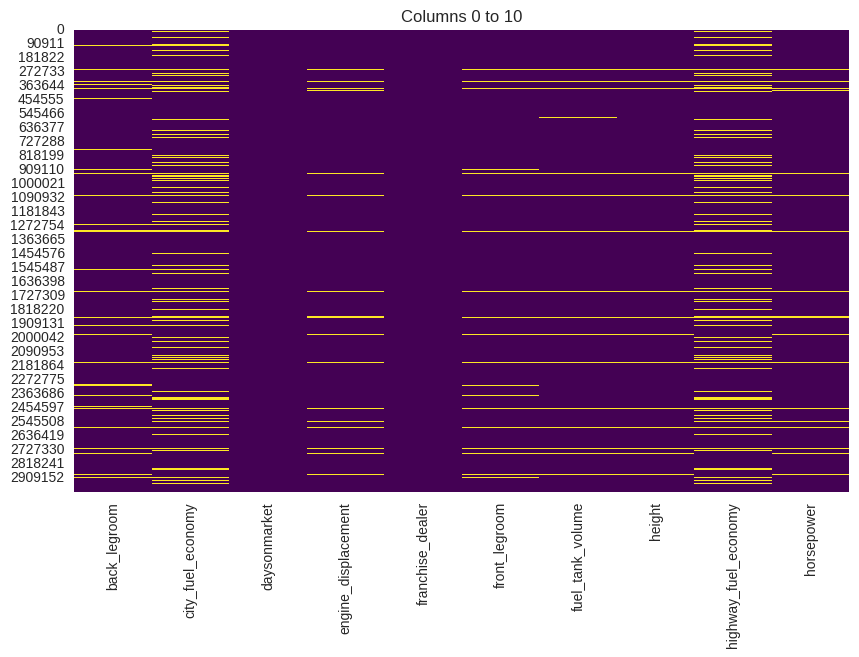

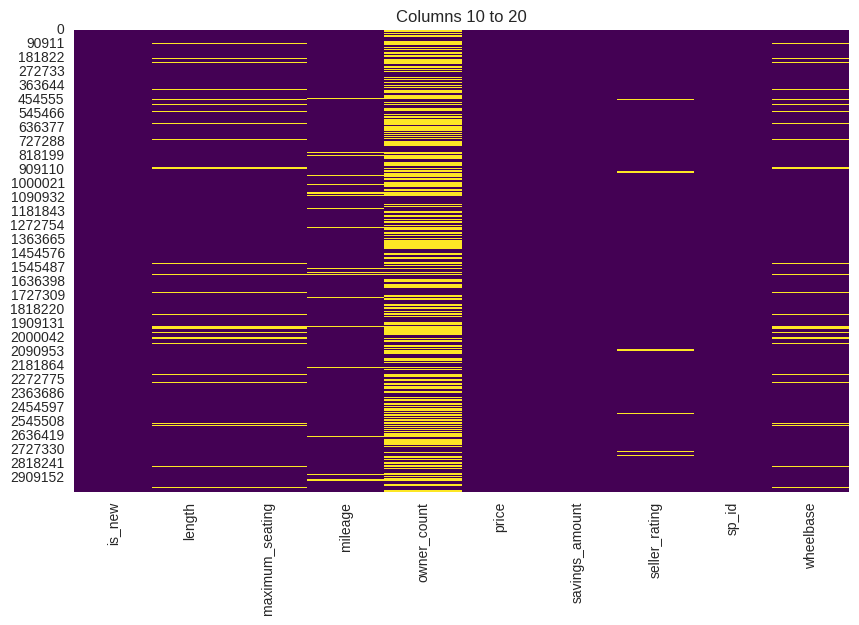

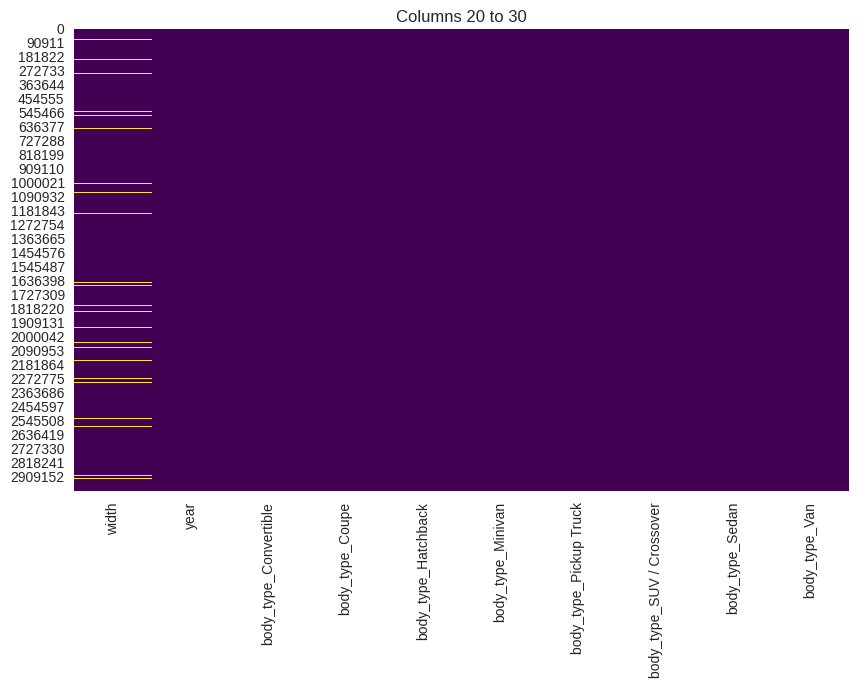

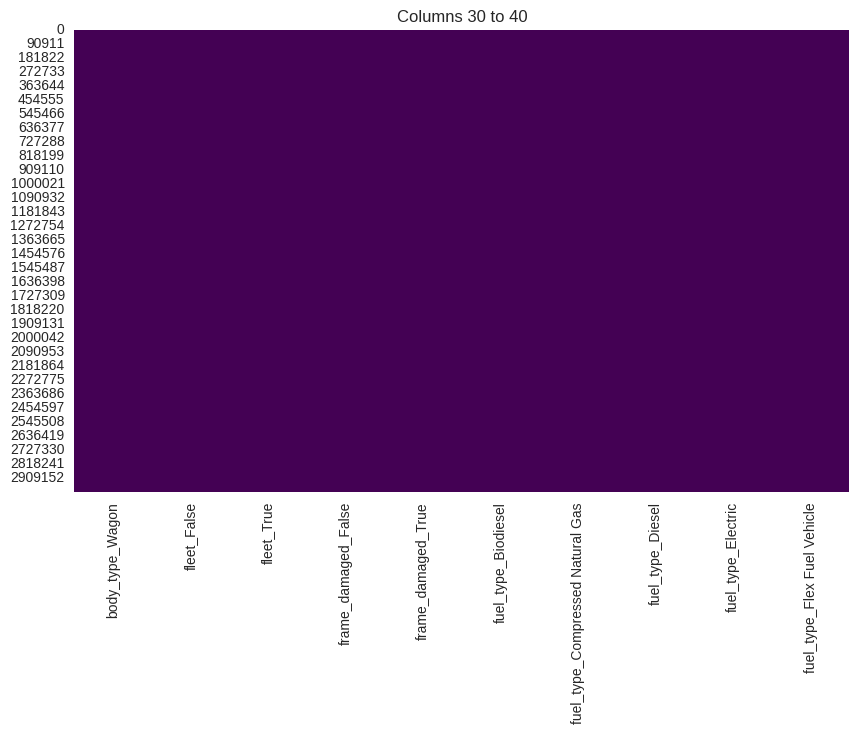

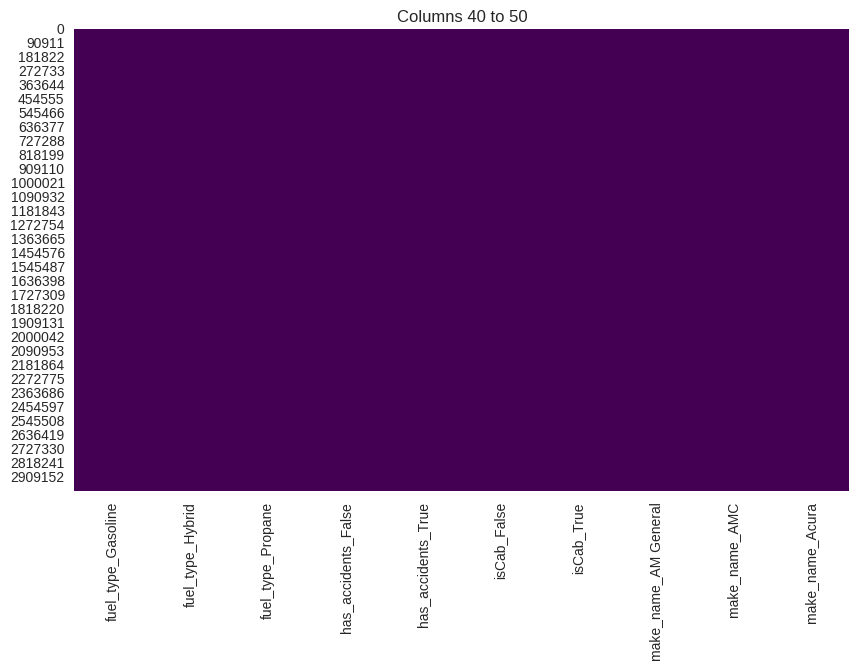

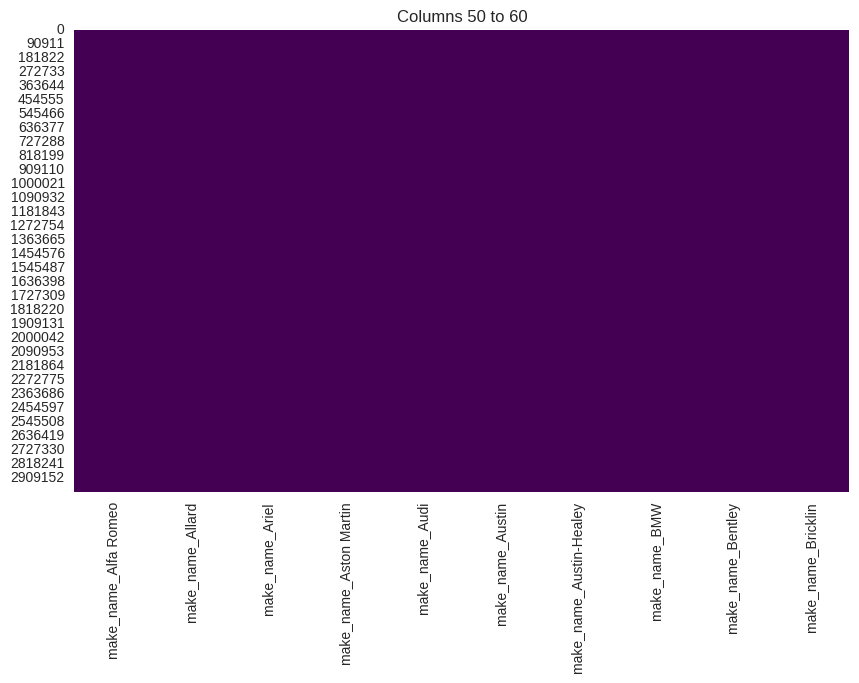

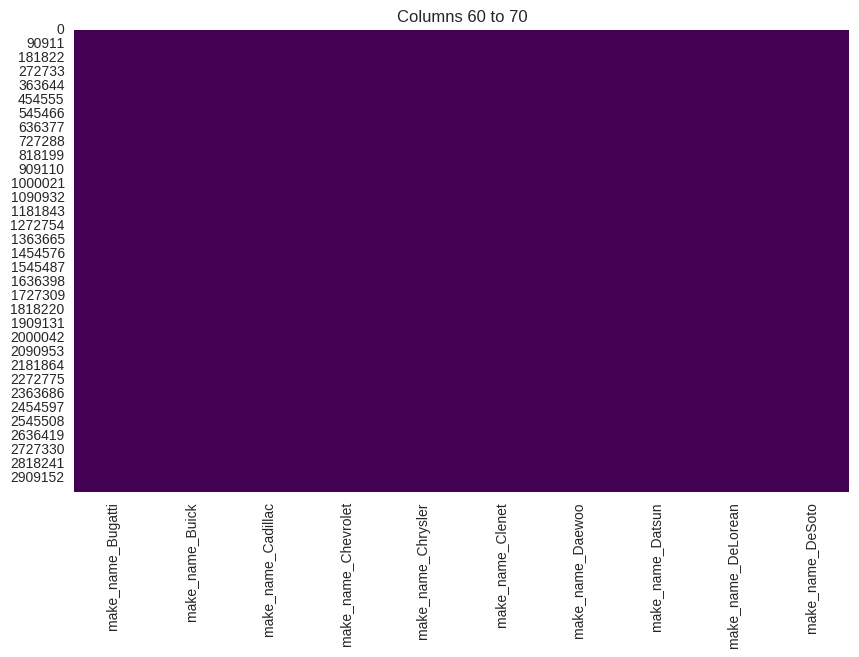

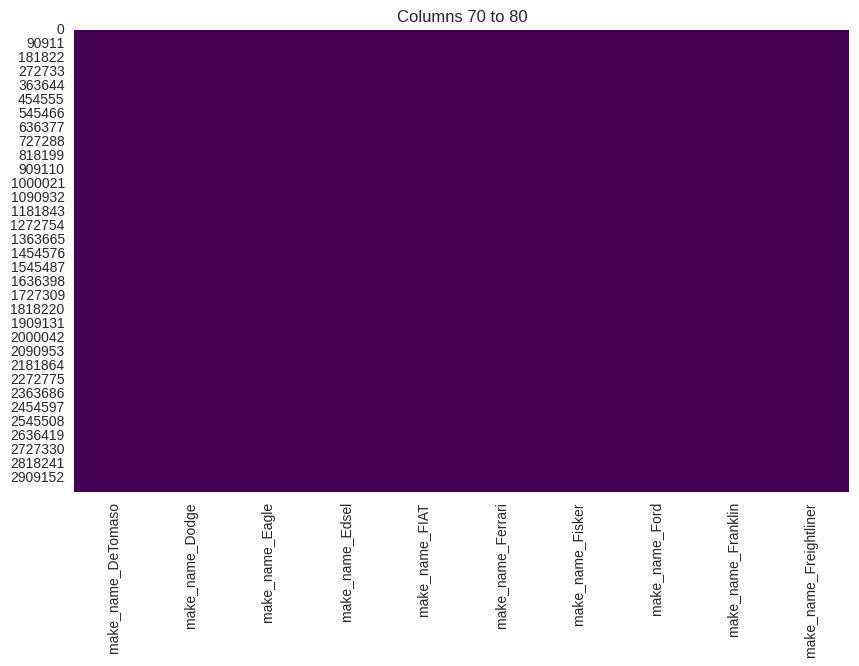

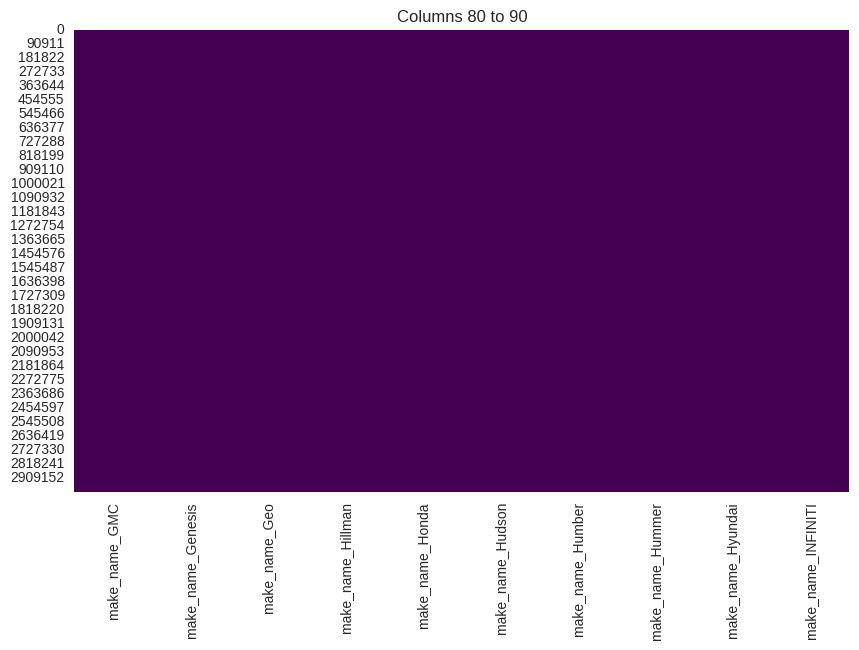

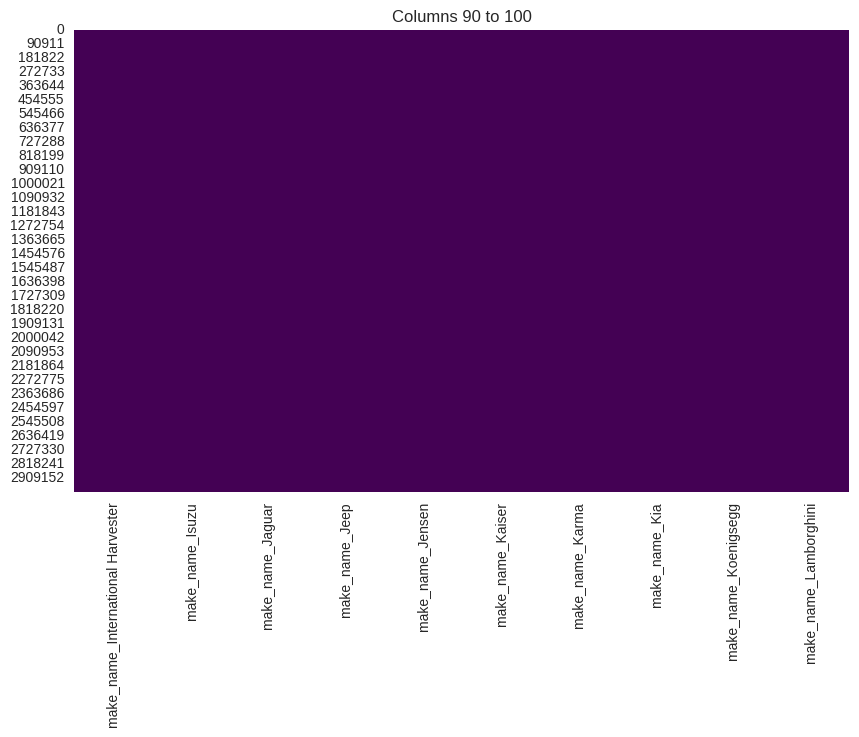

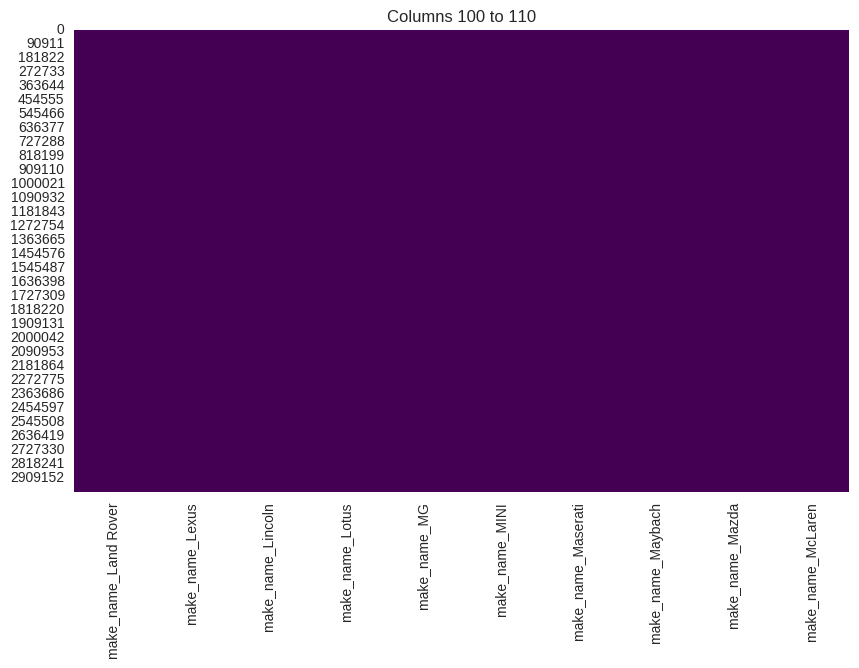

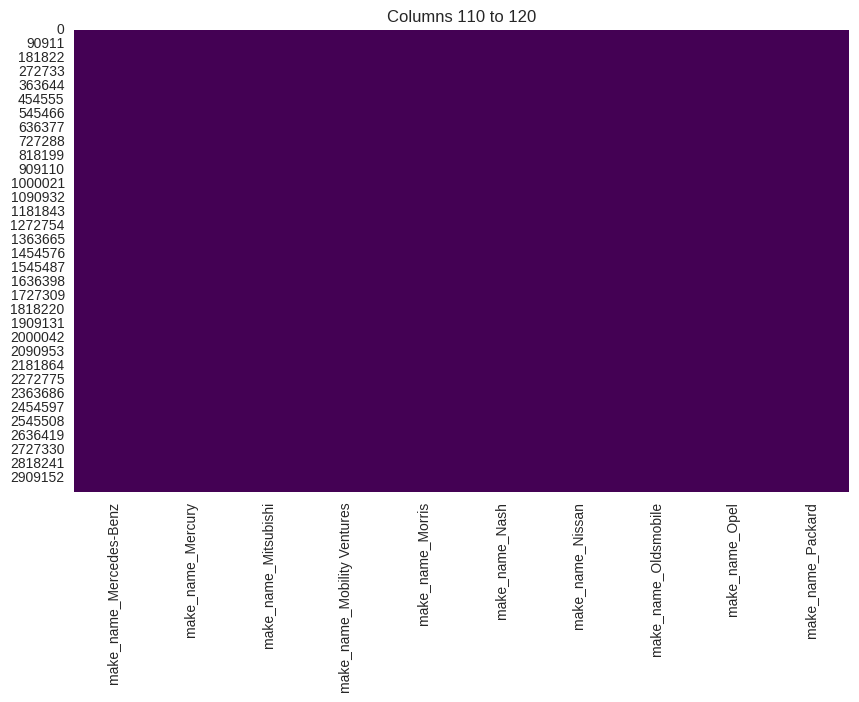

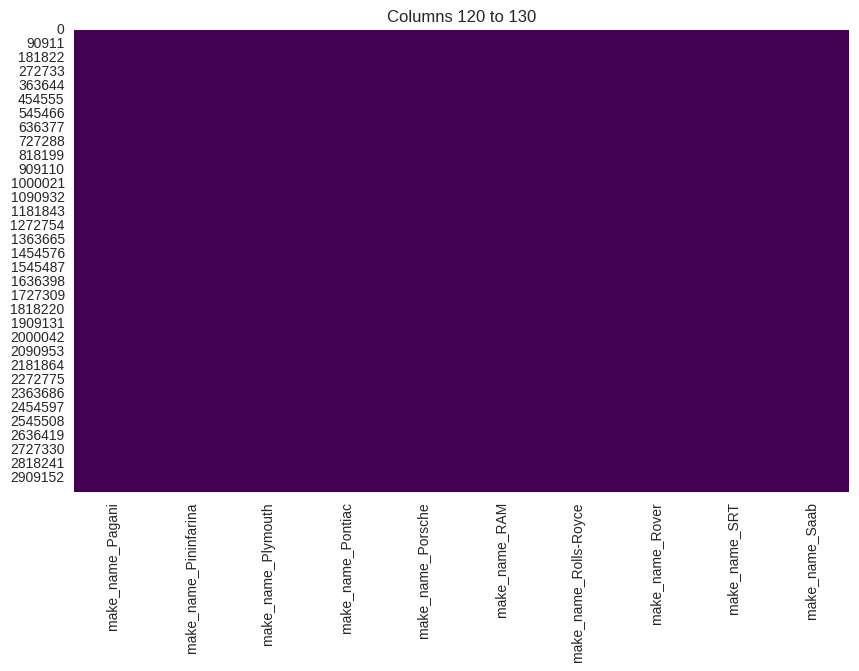

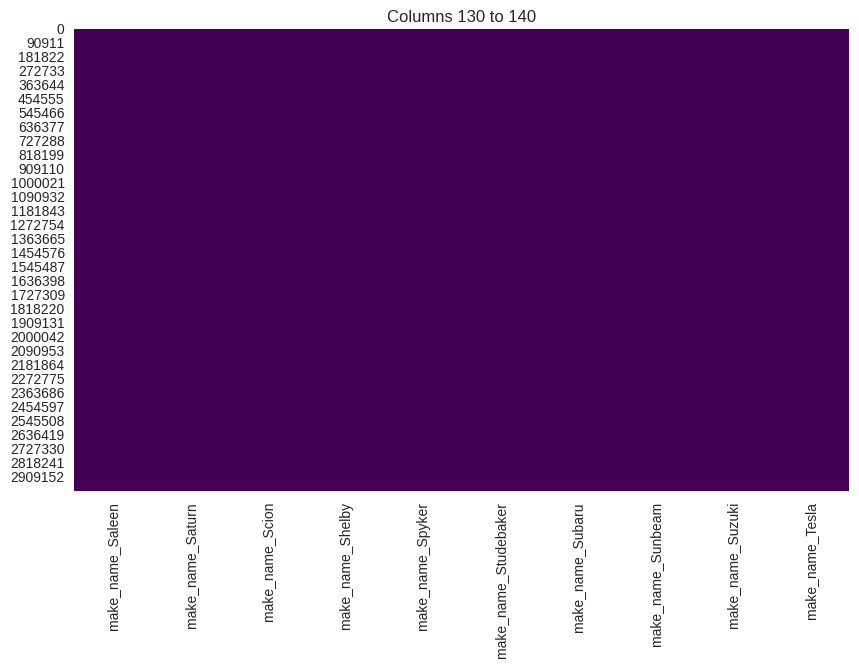

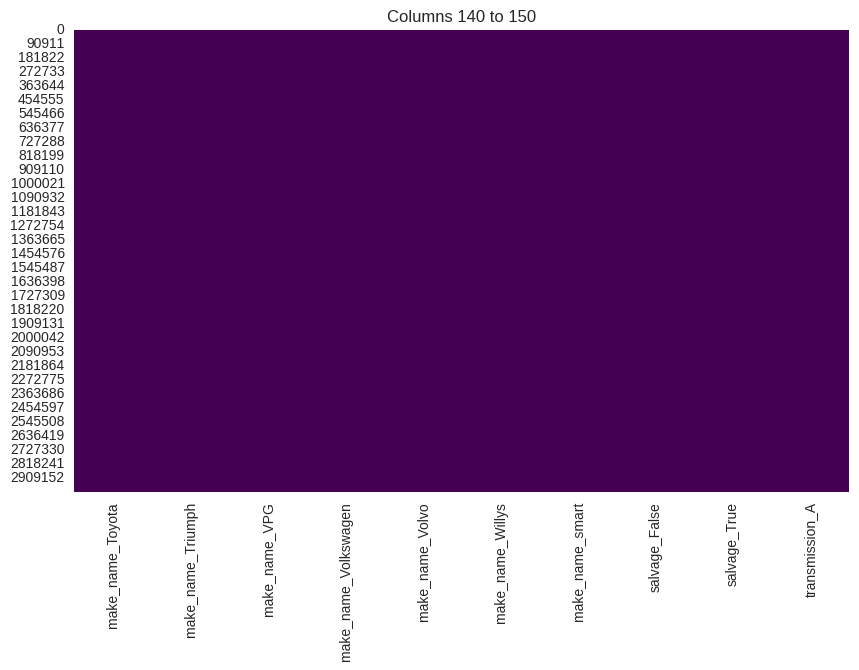

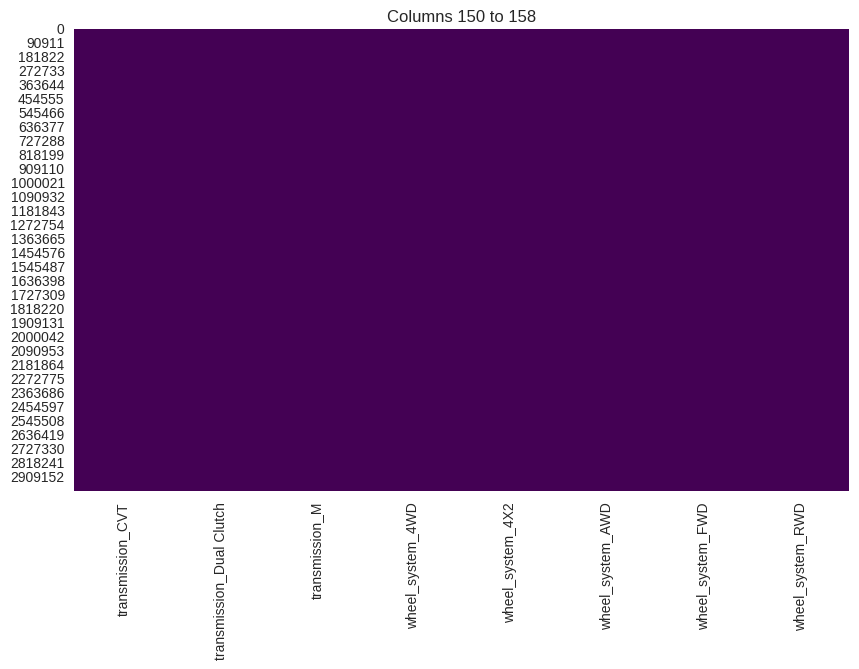

In [ ]:
# 4. Plot heatmaps for missing data
n_cols = df.shape[1]
for i in range(0, n_cols, 10):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.iloc[:, i:min(i+10, n_cols)].isnull(), cbar=False, cmap='viridis')
    plt.title(f'Columns {i} to {min(i+10, n_cols)}')
    plt.show()

In [ ]:
# Number of rows before dropping
num_rows_before = df.shape[0]

# Drop rows with missing values
df_no_na = df.dropna()

# Number of rows after dropping
num_rows_after = df_no_na.shape[0]

# Calculate and print number of rows dropped
num_rows_dropped = num_rows_before - num_rows_after
print(f"Number of rows dropped: {num_rows_dropped}")


Number of rows dropped: 1809343


In [ ]:
df.head()

back_legroom  city_fuel_economy  daysonmarket  engine_displacement  \
0         35.10                NaN           522              1300.00   
1         38.10                NaN           207              2000.00   
2         35.40              17.00          1233              2500.00   
3         37.60                NaN           196              3000.00   
4         38.10                NaN           137              2000.00   

   franchise_dealer  front_legroom  fuel_tank_volume  height  \
0              True          41.20             12.70   66.50   
1              True          39.10             17.70   68.00   
2              True          43.30             15.90   58.10   
3              True          39.00             23.50   73.00   
4              True          39.10             17.70   68.00   

   highway_fuel_economy  horsepower  is_new  length  maximum_seating  mileage  \
0                   NaN      177.00    True  166.60             5.00     7.00   
1                   NaN      246.00    True  181.00             7.00     8.00   
2                 23.00      305.00   False  180.90             5.00      NaN   
3                   NaN      340.00    True  195.10             7.00    11.00   
4                   NaN      246.00    True  181.00             7.00     7.00   

   owner_count    price  savings_amount  seller_rating     sp_id  wheelbase  \
0          NaN 23141.00               0           2.80 370599.00     101.20   
1          NaN 46500.00               0           3.00 389227.00     107.90   
2         3.00 46995.00               0            NaN 370467.00     104.30   
3          NaN 67430.00               0           3.00 389227.00     115.00   
4          NaN 48880.00               0           3.00 389227.00     107.90   

   width  year  body_type_Convertible  body_type_Coupe  body_type_Hatchback  \
0  79.60  2019                      0                0                    0   
1  85.60  2020                      0                0                    0   
2  78.90  2016                      0                0                    0   
3  87.40  2020                      0                0                    0   
4  85.60  2020                      0                0                    0   

   body_type_Minivan  body_type_Pickup Truck  body_type_SUV / Crossover  \
0                  0                       0                          1   
1                  0                       0                          1   
2                  0                       0                          0   
3                  0                       0                          1   
4                  0                       0                          1   

   body_type_Sedan  body_type_Van  body_type_Wagon  fleet_False  fleet_True  \
0                0              0                0            0           0   
1                0              0                0            0           0   
2                1              0                0            1           0   
3                0              0                0            0           0   
4                0              0                0            0           0   

   frame_damaged_False  frame_damaged_True  fuel_type_Biodiesel  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    1                   0                    0   
3                    0                   0                    0   
4                    0                   0                    0   

   fuel_type_Compressed Natural Gas  fuel_type_Diesel  fuel_type_Electric  \
0                                 0                 0                   0   
1                                 0                 0                   0   
2                                 0                 0                   0   
3                                 0                 0                   0   
4                           

In [ ]:
# Calculate number of unique values in 'owner_count'
num_unique_values = df['owner_count'].nunique()
print(f"Number of unique values in 'owner_count': {num_unique_values}")

# Drop 'owner_count' column
df_dropped = df.drop(columns='owner_count')

# Number of rows before dropping
num_rows_before = df_dropped.shape[0]

# Drop rows with missing values
df_no_na = df_dropped.dropna()

# Number of rows after dropping
num_rows_after = df_no_na.shape[0]

# Calculate and print number of rows dropped
num_rows_dropped = num_rows_before - num_rows_after
print(f"Number of rows dropped: {num_rows_dropped}")


Number of unique values in 'owner_count': 18
Number of rows dropped: 709594


In [ ]:
# Calculate number of unique values in 'owner_count'
num_unique_values = df['owner_count'].nunique()
print(f"Number of unique values in 'owner_count': {num_unique_values}")

# Drop 'owner_count' column
df = df.drop(columns='owner_count')

# Number of rows before dropping
num_rows_before = df.shape[0]

# Drop rows with missing values
df = df.dropna()

# Number of rows after dropping
num_rows_after = df.shape[0]

# Calculate and print number of rows dropped
num_rows_dropped = num_rows_before - num_rows_after
print(f"Number of rows dropped: {num_rows_dropped}")
print(f"Number of rows remaining: {num_rows_after}")


Number of unique values in 'owner_count': 18
Number of rows dropped: 709594
Number of rows remaining: 2290446


In [ ]:
#download
# Write DataFrame to CSV
#df.to_csv('cleaned_data.csv', index=False)


In [ ]:
#from google.colab import files
#files.download('cleaned_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Print data types for all columns
print(df.dtypes.to_string())


back_legroom                         float64
city_fuel_economy                    float64
daysonmarket                           int64
engine_displacement                  float64
franchise_dealer                        bool
front_legroom                        float64
fuel_tank_volume                     float64
height                               float64
highway_fuel_economy                 float64
horsepower                           float64
is_new                                  bool
length                               float64
maximum_seating                      float64
mileage                              float64
price                                float64
savings_amount                         int64
seller_rating                        float64
sp_id                                float64
wheelbase                            float64
width                                float64
year                                   int64
body_type_Convertible                  uint8
body_type_

#Big XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define predictors and target
X = df.drop('price', axis=1)
y = np.log1p(df['price']) # Apply log transformation

# Label encode categorical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}
for cat_col in categorical_cols:
    label_encoders[cat_col] = LabelEncoder()
    X[cat_col] = label_encoders[cat_col].fit_transform(X[cat_col].astype(str))

# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)

# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [ ]:
# XGBoost model
xgb = XGBRegressor(n_jobs=-1, tree_method='gpu_hist')  # Set tree_method to 'gpu_hist'


In [ ]:
# Hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'learning_rate': [0.01, .05, 0.1, 0.15, 0.2, 0.3],
    'max_depth': [3, 4, 5, 10, 25],
    'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'gamma': [0, 0.25, 0.5, 1.0, 2.0, 5.0],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'tree_method': ['gpu_hist']  # Ensure that the GPU is used during the randomized search

}

# RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', n_jobs=-1, cv=5, verbose=3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
13 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1025, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
  

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          predictor=None, random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9, 1],
                                        'gamma': [0, 0.25, 0.5, 1.0, 2.0, 5.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2, 0.3],
                                        'max_depth': [3, 4, 5, 10, 25],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1],
                                        'tree_method': ['gpu_hist']},
                   scoring='neg_mean_squared_error', verbose=3)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE and R2
y_pred = random_search.predict(X_test)

mae = mean_absolute_error(np.exp(y_test), np.exp(y_pred))
mse = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
# Create DataFrame
metrics_df = pd.DataFrame({
    'Mean Squared Error': [mse],
    'Root Mean Squared Error': [rmse],
    'Mean Absolute Error': [mae],
    'R2 Score': [r_square]
})

# Display DataFrame
metrics_df


Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  R2 Score
0                0.01                     0.10              1996.74      0.97

In [ ]:
print("Mean Squared Error : {:.5f}".format(mse))
print("Root Mean Squared Error : {:.5f}".format(rmse))
print("R^2 Score : {:.5f}".format(r_square))

Mean Squared Error : 0.01055
Root Mean Squared Error : 0.10271
R^2 Score : 0.96754


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 27.7 MB/s eta 0:00:00


In [ ]:
#normal residuals
import shap
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# Make predictions
y_pred = random_search.predict(X_test)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Calculate residuals
residuals = y_test - y_pred


Mean Squared Error: 0.01054883116686164
Root Mean Squared Error: 0.10270750297257568


In [ ]:
# Exp residuals
mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Calculate residuals
residualsexp = np.exp(y_test) - np.exp(y_pred)

Mean Squared Error: 11079193.372453416
Root Mean Squared Error: 3328.542229333048


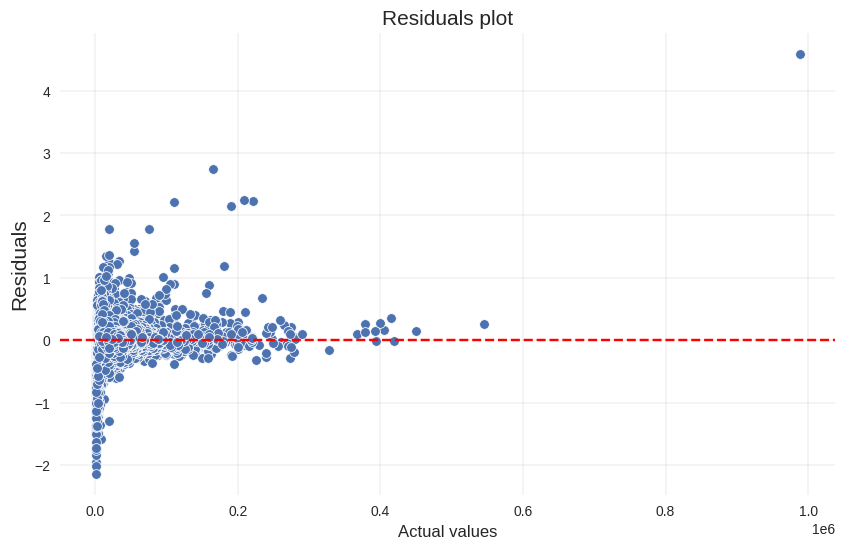

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.exp(y_test), y=residuals)
plt.title('Residuals plot', size=15)
plt.xlabel('Actual values', size=12)
plt.ylabel('Residuals', size=15)
plt.axhline(0, color='r', linestyle='--')
plt.gca().set_facecolor('white')  # Change background to white
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()

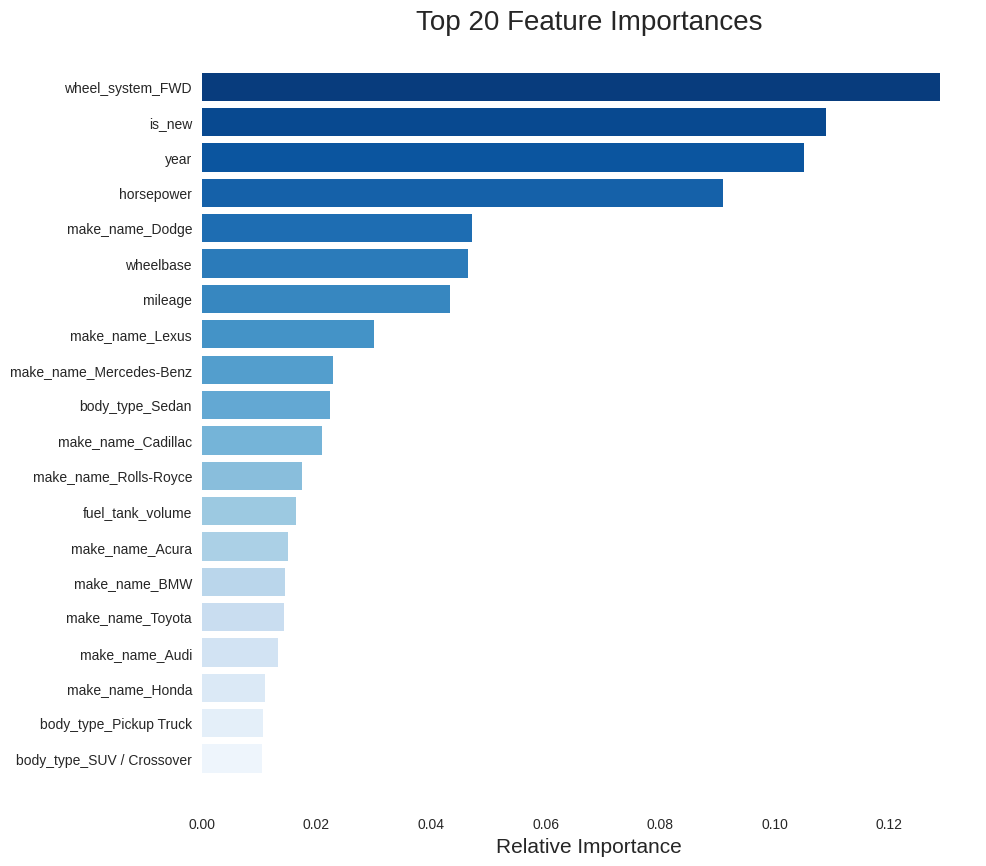

In [ ]:
# get feature importances
importances = random_search.best_estimator_.feature_importances_

# get feature names
feature_names = X.columns

# get indices sorted by importance
indices = np.argsort(importances)[-20:]  # Select the top 20

# Plot feature importance
plt.figure(figsize=(10, 10))  # Adjust the size of the plot
plt.title('Top 20 Feature Importances', size=20)  # Increase the title font size
plt.barh(range(len(indices)), importances[indices], color=sns.color_palette("Blues", len(indices)), align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10)  # Reduce the font size of the y-axis labels
plt.xlabel('Relative Importance', size=15)  # Increase the font size of the x-axis label
plt.gca().set_facecolor('white')
plt.grid(False)
plt.show()


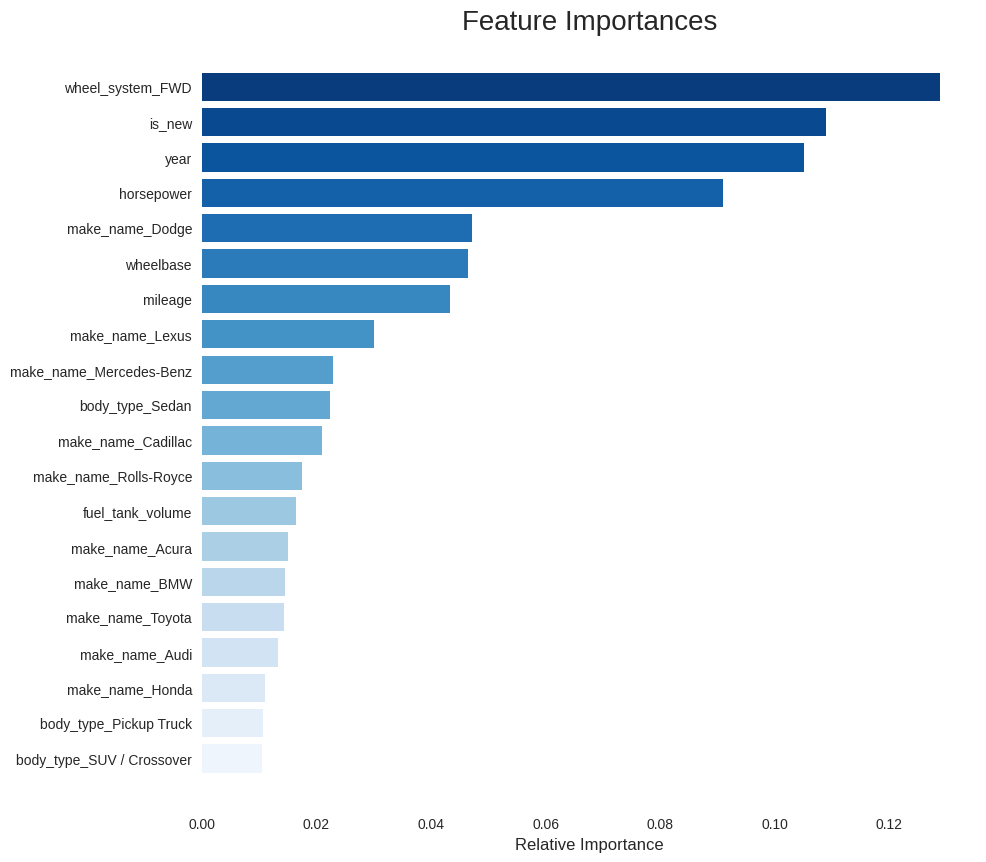

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 10))  # Adjust the size of the plot
plt.title('Feature Importances', size=20)  # Increase the title font size
plt.barh(range(len(indices)), importances[indices], color=sns.color_palette("Blues", len(indices)), align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10)  # Reduce the font size of the y-axis labels
plt.xlabel('Relative Importance', size=12)  # Reduce the font size of the x-axis label
plt.tick_params(axis='x', labelsize=10)  # Adjust the font size of x-axis tick labels
plt.gca().set_facecolor('white')
plt.grid(False)
plt.show()


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


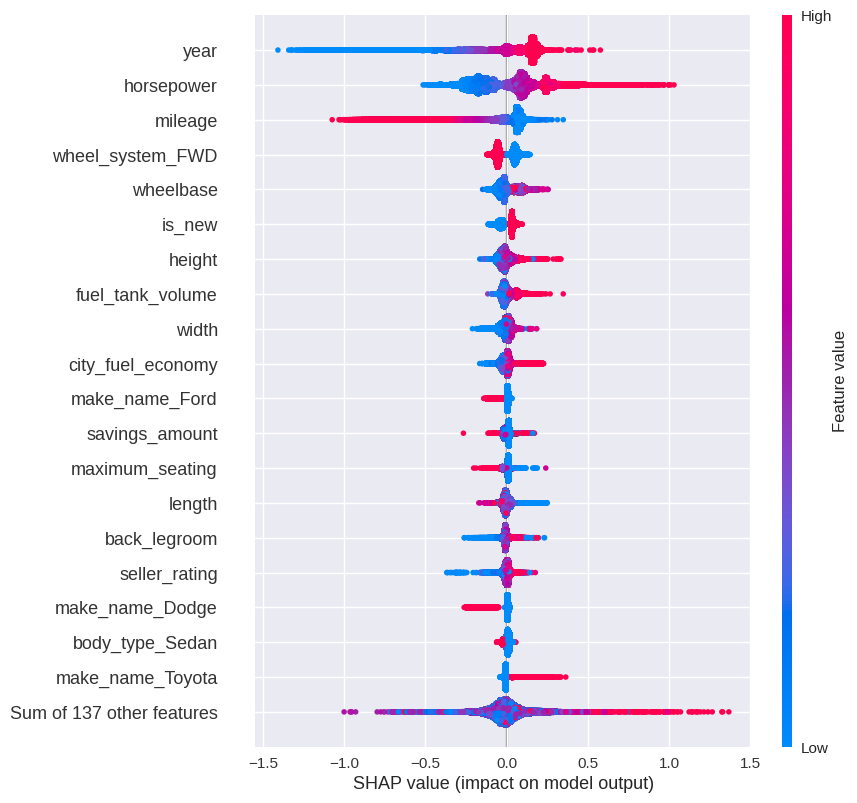

In [ ]:
# Store column names before scaling
features = X.columns.tolist()

# ... Your scaling and training operations ...

# After training your model
import shap

# Initialize your explainer using your trained model and your stored feature names
explainer = shap.Explainer(random_search.best_estimator_, feature_names=features)

# Compute SHAP values
shap_values = explainer(X_test)

# Create the SHAP beeswarm plot
shap.plots.beeswarm(shap_values, max_display=20)


In [ ]:
import pandas as pd

# Extract best parameters
best_params = random_search.best_params_

# Convert to DataFrame
best_params_df = pd.DataFrame([best_params])

# Display the DataFrame
print(best_params_df)


  tree_method  subsample  n_estimators  max_depth  learning_rate  gamma  \
0    gpu_hist       0.90          1000          5           0.30      0   

   colsample_bytree  
0              0.70  


In [ ]:
!pip install graphviz pydotplus


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


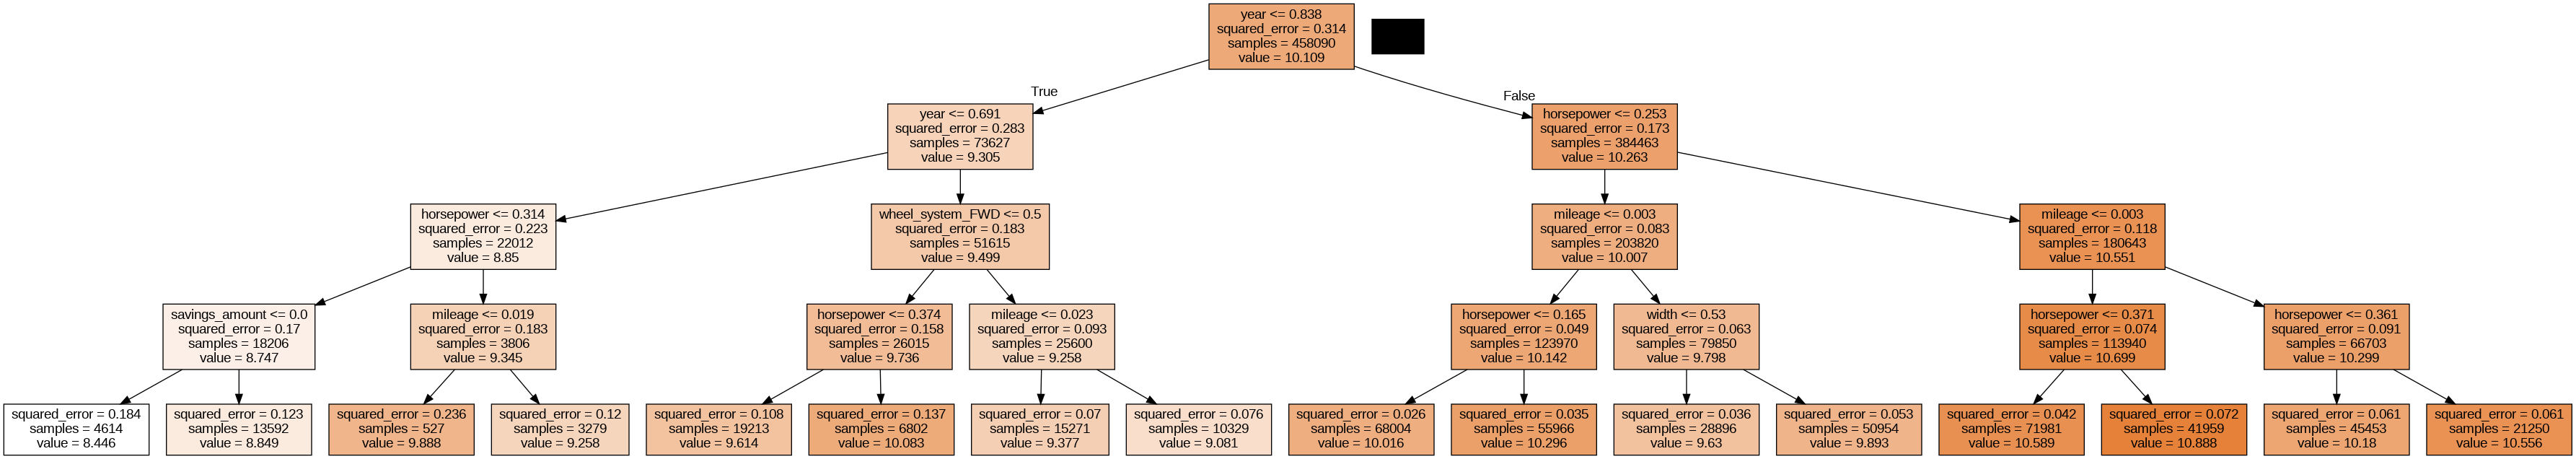

In [ ]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create a surrogate model parameters
surrogate_model_params = {"max_depth": 4} # set max_depth as you need

# Fit the surrogate model with the predictions of your XGBoost model
surrogate_model_unconstrained = DecisionTreeRegressor(**surrogate_model_params).fit(X_test, random_search.predict(X_test))

dot_data = export_graphviz(surrogate_model_unconstrained, out_file=None, 
                                feature_names=X.columns,  
                                filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png()) 


#Net 2.0 Efficient Learn Search: OneCycleLR

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define predictors and target
X = df.drop('price', axis=1)
y = np.log1p(df['price']) # Apply log transformation
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)

In [ ]:
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())


In [ ]:
EPOCHS = 150
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)


In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
import torch
import torch.nn as nn

class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 64)   # Increased number of neurons
        self.layer_2 = nn.Linear(64, 128)            # Added extra layer
        self.layer_3 = nn.Linear(128, 64)            # Increased number of neurons
        self.layer_4 = nn.Linear(64, 32)             # Added extra layer
        self.layer_out = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        return x
    
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = MultipleRegression(NUM_FEATURES)
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)   # Changed optimizer to SGD as required by OneCycleLR
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=EPOCHS)  # Added scheduler

loss_stats = {
    'train': [],
    "val": []
}
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()
        scheduler.step()    # Step the scheduler
        
        train_epoch_loss += train_loss.item()
        
    # Rest of your code remains the same...
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')



cuda:0
MultipleRegression(
  (layer_1): Linear(in_features=156, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_4): Linear(in_features=64, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)
Begin training.


  0%|          | 0/150 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.13038 | Val Loss: 0.02139
Epoch 002: | Train Loss: 0.02096 | Val Loss: 0.02090
Epoch 003: | Train Loss: 0.01978 | Val Loss: 0.01917
Epoch 004: | Train Loss: 0.01893 | Val Loss: 0.01847
Epoch 005: | Train Loss: 0.01830 | Val Loss: 0.01752
Epoch 006: | Train Loss: 0.01780 | Val Loss: 0.02036
Epoch 007: | Train Loss: 0.01740 | Val Loss: 0.01698
Epoch 008: | Train Loss: 0.01713 | Val Loss: 0.01706
Epoch 009: | Train Loss: 0.01688 | Val Loss: 0.01628
Epoch 010: | Train Loss: 0.01666 | Val Loss: 0.01602
Epoch 011: | Train Loss: 0.01650 | Val Loss: 0.01587
Epoch 012: | Train Loss: 0.01636 | Val Loss: 0.01976
Epoch 013: | Train Loss: 0.01621 | Val Loss: 0.01646
Epoch 014: | Train Loss: 0.01611 | Val Loss: 0.01615
Epoch 015: | Train Loss: 0.01597 | Val Loss: 0.01554
Epoch 016: | Train Loss: 0.01580 | Val Loss: 0.01508
Epoch 017: | Train Loss: 0.01574 | Val Loss: 0.01627
Epoch 018: | Train Loss: 0.01566 | Val Loss: 0.01558
Epoch 019: | Train Loss: 0.01550 | Val Loss: 0

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

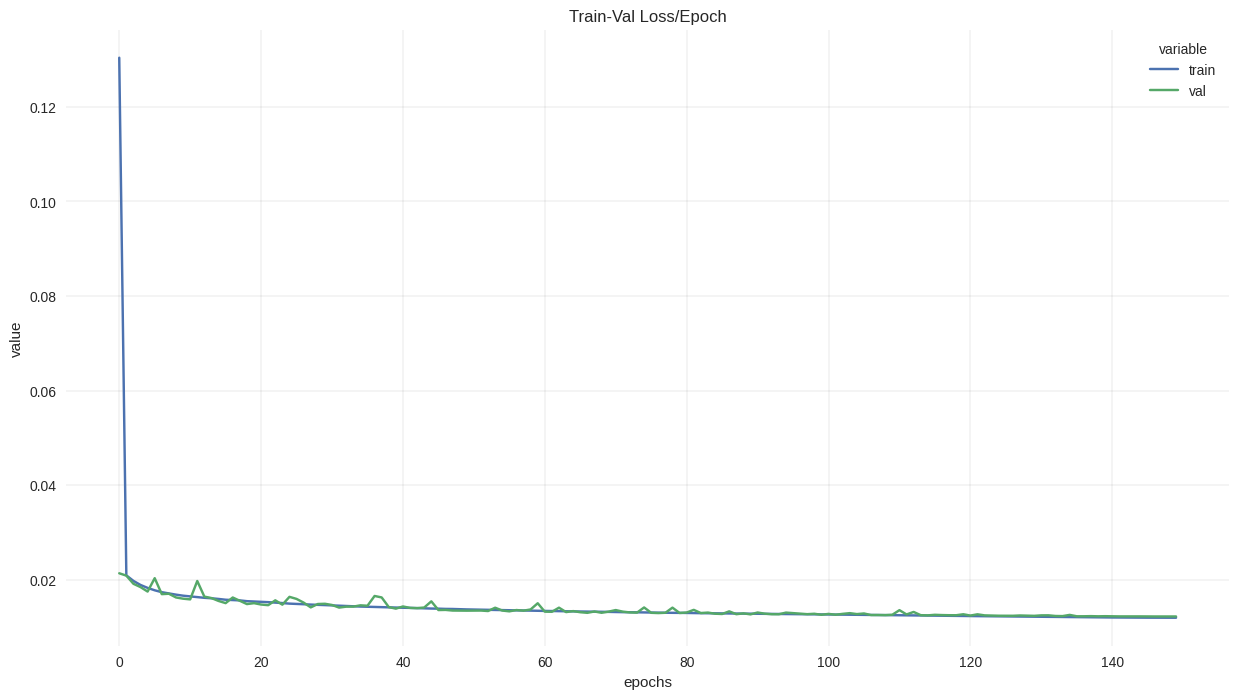

In [ ]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('white')  # Change background to white
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
rmse = np.sqrt(mse)

print("Mean Squared Error : {:.5f}".format(mse))
print("Root Mean Squared Error : {:.5f}".format(rmse))
print("R^2 Score : {:.5f}".format(r_square))

Mean Squared Error : 0.01232
Root Mean Squared Error : 0.11101
R^2 Score : 0.96196


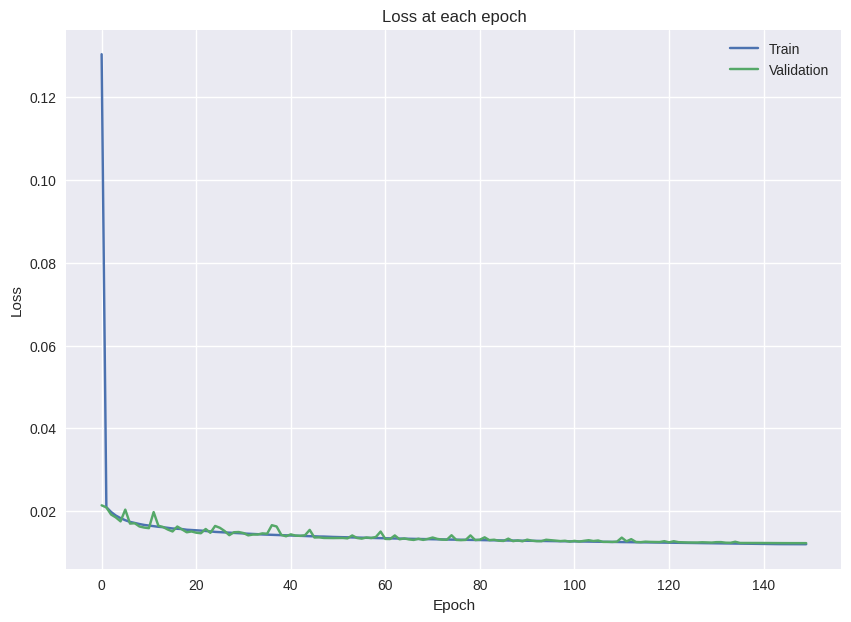

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(loss_stats['train'], label='Train')
plt.plot(loss_stats['val'], label='Validation')
plt.title('Loss at each epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=4e16cb348a390b35af8349a129be8ba22f5a029b01ab8a25d2a453998a2463bf
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


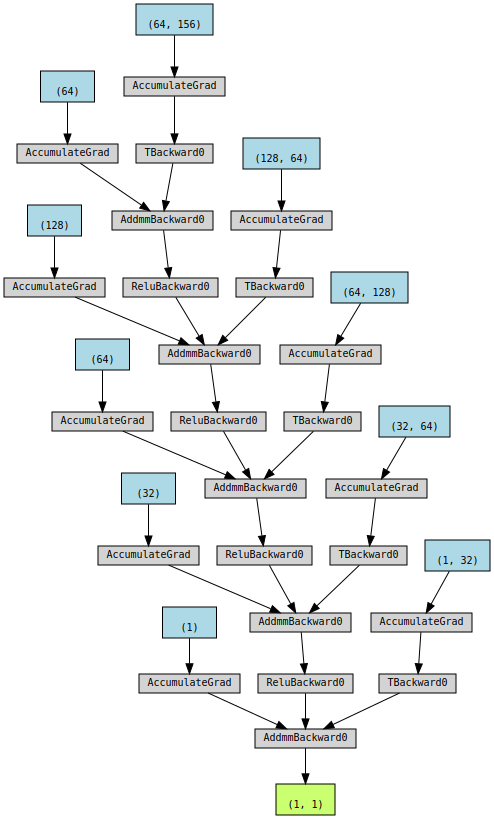

In [ ]:
from torchviz import make_dot

x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 


In [ ]:
!pip install hiddenlayer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 99.4 MB/s eta 0:00:00


In [ ]:
from torchviz import make_dot

x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 
torch.onnx.export(model, x, "model.onnx")


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



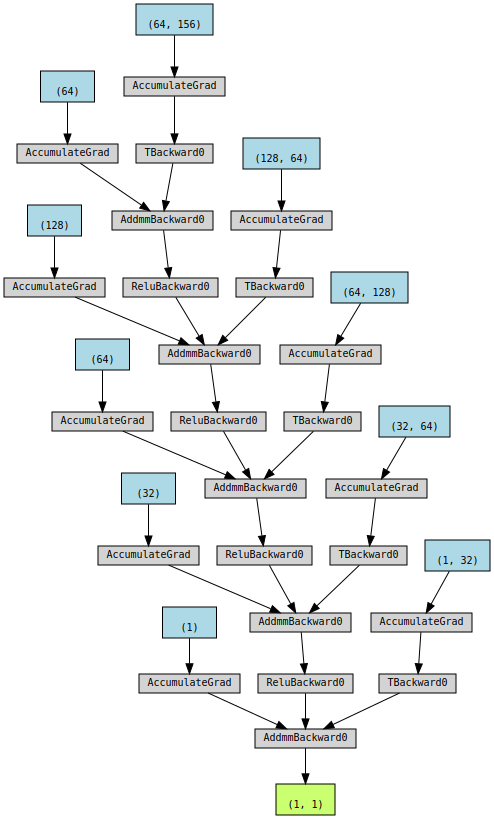

In [ ]:
from torchviz import make_dot

x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out)


In [ ]:
class LargeRegression(nn.Module):
    def __init__(self, num_features):
        super(LargeRegression, self).__init__()

        self.layer_1 = nn.Linear(num_features, 256)
        self.batch_norm1 = nn.BatchNorm1d(256)
        self.dropout = nn.Dropout(0.2)
        
        self.layer_2 = nn.Linear(256, 512)
        self.batch_norm2 = nn.BatchNorm1d(512)
        
        self.layer_3 = nn.Linear(512, 1024)
        self.batch_norm3 = nn.BatchNorm1d(1024)
        
        self.layer_4 = nn.Linear(1024, 2048)
        self.batch_norm4 = nn.BatchNorm1d(2048)
        
        self.layer_5 = nn.Linear(2048, 1024)
        self.batch_norm5 = nn.BatchNorm1d(1024)
        
        self.layer_6 = nn.Linear(1024, 512)
        self.batch_norm6 = nn.BatchNorm1d(512)
        
        self.layer_7 = nn.Linear(512, 256)
        self.batch_norm7 = nn.BatchNorm1d(256)
        
        self.layer_8 = nn.Linear(256, 128)
        self.batch_norm8 = nn.BatchNorm1d(128)
        
        self.layer_9 = nn.Linear(128, 64)
        self.batch_norm9 = nn.BatchNorm1d(64)
        
        self.layer_10 = nn.Linear(64, 32)
        self.batch_norm10 = nn.BatchNorm1d(32)
        
        self.layer_out = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()

    def forward(self, inputs):
        x = self.relu(self.dropout(self.batch_norm1(self.layer_1(inputs))))
        x = self.relu(self.dropout(self.batch_norm2(self.layer_2(x))))
        x = self.relu(self.dropout(self.batch_norm3(self.layer_3(x))))
        x = self.relu(self.dropout(self.batch_norm4(self.layer_4(x))))
        x = self.relu(self.dropout(self.batch_norm5(self.layer_5(x))))
        x = self.relu(self.dropout(self.batch_norm6(self.layer_6(x))))
        x = self.relu(self.dropout(self.batch_norm7(self.layer_7(x))))
        x = self.relu(self.dropout(self.batch_norm8(self.layer_8(x))))
        x = self.relu(self.dropout(self.batch_norm9(self.layer_9(x))))
        x = self.relu(self.dropout(self.batch_norm10(self.layer_10(x))))
        x = self.layer_out(x)
        return x
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = LargeRegression(NUM_FEATURES)
model.to(device)

print(model)

# Let's use a slightly higher constant learning rate, say 0.15
lr = 0.03
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

criterion = nn.MSELoss()

loss_stats = {
    'train': [],
    "val": []
}

print("Begin training.")

for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()    # No scheduler.step()
        
        train_epoch_loss += train_loss.item()
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

NameError: ignored

In [ ]:
num_features = 150
total_parameters = num_features*256 + 256 + 131584 + 525312 + 2099200 + 2098176 + 524800 + 131328 + 32896 + 8256 + 2080 + 33
total_parameters += 2*(256 + 512 + 1024 + 2048 + 1024 + 512 + 256 + 128 + 64 + 32)
print("Total parameters:", total_parameters)

Total parameters: 5604033


#Neural Network Baseline


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# Define predictors and target
X = df.drop('price', axis=1)
y = np.log1p(df['price']) # Apply log transformation
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)

In [ ]:
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())


In [ ]:
EPOCHS = 150
BATCH_SIZE = 64
LEARNING_RATE = 0.001
NUM_FEATURES = len(X.columns)


In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [ ]:
import torch
import torch.nn as nn

class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16, 32)
        self.layer_3 = nn.Linear(32, 16)
        self.layer_out = nn.Linear(16, 1)
        
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return x
    
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.layer_out(x)
        return x


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = MultipleRegression(NUM_FEATURES)
model.to(device)
print(model)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


MultipleRegression(
  (layer_1): Linear(in_features=156, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=32, bias=True)
  (layer_3): Linear(in_features=32, out_features=16, bias=True)
  (layer_out): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
loss_stats = {
    'train': [],
    "val": []
}

In [ ]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')


Begin training.


  0%|          | 0/150 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.32479 | Val Loss: 0.02323
Epoch 002: | Train Loss: 0.02185 | Val Loss: 0.02004
Epoch 003: | Train Loss: 0.02101 | Val Loss: 0.01995
Epoch 004: | Train Loss: 0.02068 | Val Loss: 0.01991
Epoch 005: | Train Loss: 0.02030 | Val Loss: 0.02264
Epoch 006: | Train Loss: 0.01998 | Val Loss: 0.01886
Epoch 007: | Train Loss: 0.01981 | Val Loss: 0.01968
Epoch 008: | Train Loss: 0.01963 | Val Loss: 0.01869
Epoch 009: | Train Loss: 0.01948 | Val Loss: 0.01864
Epoch 010: | Train Loss: 0.01913 | Val Loss: 0.01938
Epoch 011: | Train Loss: 0.01867 | Val Loss: 0.01869
Epoch 012: | Train Loss: 0.01834 | Val Loss: 0.01811
Epoch 013: | Train Loss: 0.01804 | Val Loss: 0.01748
Epoch 014: | Train Loss: 0.01782 | Val Loss: 0.01874
Epoch 015: | Train Loss: 0.01759 | Val Loss: 0.01859
Epoch 016: | Train Loss: 0.01734 | Val Loss: 0.01669
Epoch 017: | Train Loss: 0.01716 | Val Loss: 0.01646
Epoch 018: | Train Loss: 0.01696 | Val Loss: 0.01650
Epoch 019: | Train Loss: 0.01681 | Val Loss: 0

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

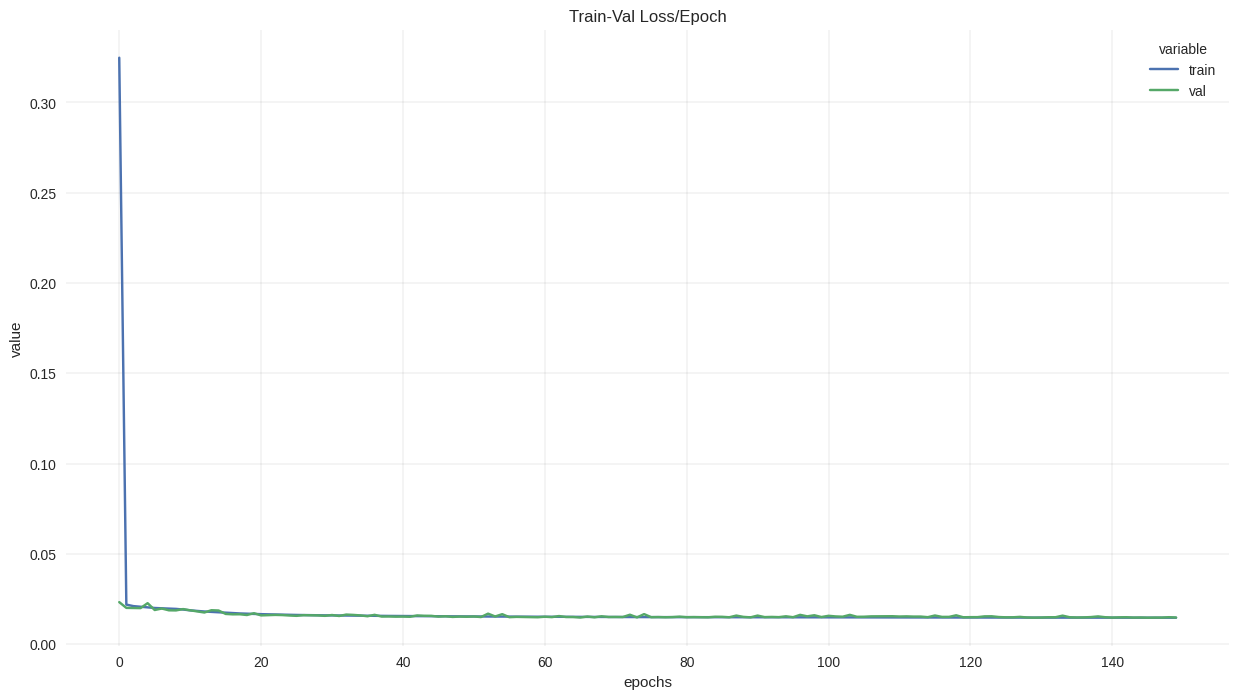

In [ ]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('white')  # Change background to white
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
rmse


0.12065873062265318

0.12065873062265318

In [ ]:
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
rmse = np.sqrt(mse)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)
print("RMSE :",rmse)

Mean Squared Error : 0.014558529275469984
R^2 : 0.9550596245148273
RMSE : 0.12065873062265318


In [ ]:
!pip install torchviz

from torchviz import make_dot

x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 

!pip install onnx

from torchviz import make_dot

x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 
torch.onnx.export(model, x, "NNBaseline.onnx")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=054c3b61d6c589632cf5c0363ed6c9c016f7b5583f0f7927448abac6c8f10091
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 88.7 MB/s eta 0:00:00
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



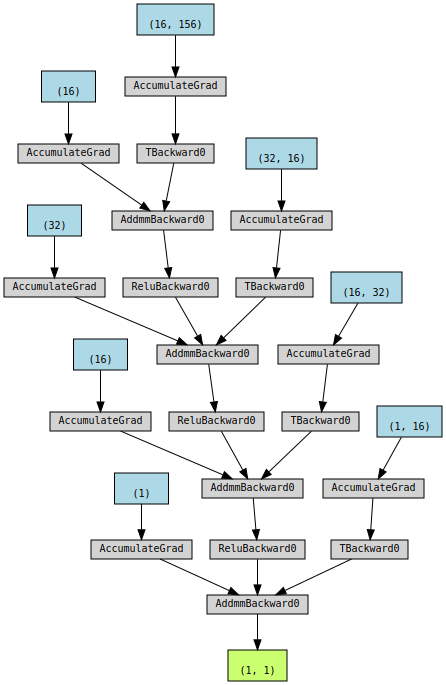

In [ ]:
x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 

In [ ]:
import shap

# Need to convert PyTorch model to a function for SHAP
def f(x):
    return model(torch.from_numpy(x).float().to(device)).cpu().detach().numpy()


# Use SHAP's KernelExplainer
# Assuming K=1000
background = shap.sample(X_train, 1000)
explainer = shap.KernelExplainer(f, background)
shap_values = explainer.shap_values(X_test)

# Visualize the explanation
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

# First, let's calculate validation loss with original (non-shuffled) data.
model.eval()
with torch.no_grad():
    original_data = torch.from_numpy(X_val).float().to(device)
    original_output = model(original_data)
    original_loss = mean_squared_error(y_val, original_output.cpu().numpy())

# Let's store the feature importances in a dictionary
importances = {}

for i in range(X_val.shape[1]):  # iterate over features
    shuffled_X_val = X_val.copy()
    np.random.shuffle(shuffled_X_val[:, i])  # shuffle one feature

    # Calculate validation loss with shuffled data
    with torch.no_grad():
        shuffled_data = torch.from_numpy(shuffled_X_val).float().to(device)
        shuffled_output = model(shuffled_data)
        shuffled_loss = mean_squared_error(y_val, shuffled_output.cpu().numpy())

    # Importance is the increase in loss
    importances[i] = shuffled_loss - original_loss

# Now, let's print out the importances
for i in sorted(importances, key=importances.get, reverse=True):
    print(f'Feature {i} has importance {importances[i]}')


Feature 19 has importance 0.09578464289924295
Feature 9 has importance 0.06728755070109697
Feature 13 has importance 0.060568743948197085
Feature 24 has importance 0.03382176140484754
Feature 7 has importance 0.019040797289062807
Feature 26 has importance 0.017471120899944383
Feature 17 has importance 0.015707899800983
Feature 11 has importance 0.015648493340561814
Feature 25 has importance 0.014337720759736243
Feature 138 has importance 0.013939849009965947
Feature 10 has importance 0.01340811431040534
Feature 154 has importance 0.012326009860297584
Feature 38 has importance 0.010362579577736156
Feature 145 has importance 0.009953995068884476
Feature 108 has importance 0.009491828054385113
Feature 99 has importance 0.009137026689708698
Feature 12 has importance 0.008876725182771562
Feature 55 has importance 0.00867326157889606
Feature 8 has importance 0.007235843430348247
Feature 82 has importance 0.0071844929976710905
Feature 153 has importance 0.0068952588085189875
Feature 37 has im

In [ ]:
# First, let's calculate validation loss with original (non-shuffled) data.
feature_names = X.columns

model.eval()
with torch.no_grad():
    original_data = torch.from_numpy(X_val).float().to(device)
    original_output = model(original_data)
    original_loss = mean_squared_error(y_val, original_output.cpu().numpy())

# Let's store the feature importances in a dictionary
importances = {}

for i in range(X_val.shape[1]):  # iterate over features
    shuffled_X_val = X_val.copy()
    np.random.shuffle(shuffled_X_val[:, i])  # shuffle one feature

    # Calculate validation loss with shuffled data
    with torch.no_grad():
        shuffled_data = torch.from_numpy(shuffled_X_val).float().to(device)
        shuffled_output = model(shuffled_data)
        shuffled_loss = mean_squared_error(y_val, shuffled_output.cpu().numpy())

    # Importance is the increase in loss
    importances[feature_names[i]] = shuffled_loss - original_loss

# Now, let's print out the importances
for i in sorted(importances, key=importances.get, reverse=True):
    print(f'Feature {i} has importance {importances[i]}')

Feature year has importance 0.09603959064535499
Feature horsepower has importance 0.06778933135904187
Feature mileage has importance 0.06047131466570159
Feature body_type_Pickup Truck has importance 0.03376628891418451
Feature height has importance 0.018998925100528273
Feature body_type_Sedan has importance 0.017258904529658288
Feature wheelbase has importance 0.015779681579069095
Feature length has importance 0.015586227713119518
Feature body_type_SUV / Crossover has importance 0.014481516021835788
Feature make_name_Toyota has importance 0.013699353282128826
Feature is_new has importance 0.013117708866559644
Feature wheel_system_FWD has importance 0.012258092492971802
Feature fuel_type_Gasoline has importance 0.010432379125585521
Feature salvage_False has importance 0.01004991575273294
Feature make_name_Mercedes-Benz has importance 0.009552158359938405
Feature make_name_Lexus has importance 0.009491735892212855
Feature maximum_seating has importance 0.008760661617000237
Feature make_n

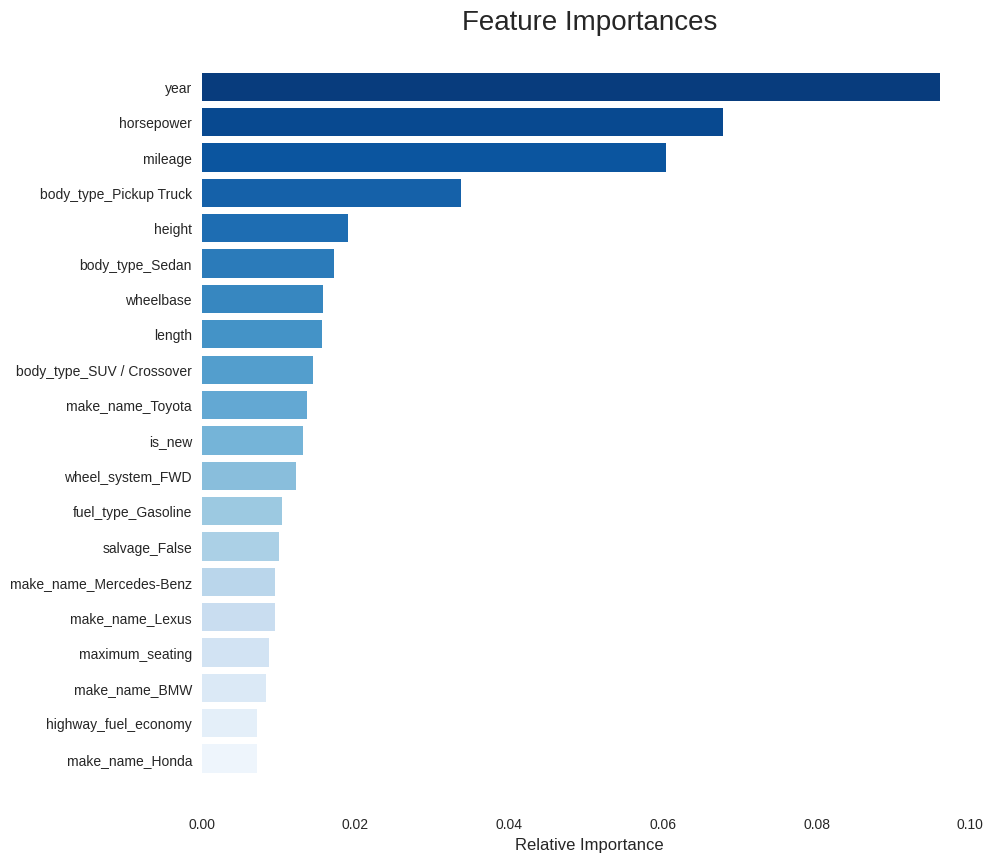

In [ ]:
# Sort importances
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Get top 20
top_20_importances = sorted_importances[:20]

# Get feature names and importance values separately
top_features = [item[0] for item in top_20_importances]
top_importance_values = [item[1] for item in top_20_importances]

# Reverse the lists for correct plot display
top_features = top_features[::-1]
top_importance_values = top_importance_values[::-1]

# Plot feature importance
plt.figure(figsize=(10, 10))  # Adjust the size of the plot
plt.title('Feature Importances', size=20)  # Increase the title font size
plt.barh(range(len(top_features)), top_importance_values, color=sns.color_palette("Blues", len(top_features)), align='center')
plt.yticks(range(len(top_features)), top_features, fontsize=10)  # Reduce the font size of the y-axis labels
plt.xlabel('Relative Importance', size=12)  # Reduce the font size of the x-axis label
plt.tick_params(axis='x', labelsize=10)  # Adjust the font size of x-axis tick labels
plt.gca().set_facecolor('white')
plt.grid(False)
plt.show()


In [ ]:
import torch
from lime import lime_tabular

# define a predict function
def predict_fn(x):
    with torch.no_grad():
        return model(torch.from_numpy(x).float().to(device)).cpu().numpy()

# instantiate explainer object
explainer = lime_tabular.LimeTabularExplainer(X_train, 
                                              mode='regression',
                                              feature_names=feature_names,
                                              verbose=True)

# explain a single instance
exp = explainer.explain_instance(X_test[0], predict_fn, num_features=20)

# visualize the explanation
exp.show_in_notebook(show_table=True)

# save the explanation to an HTML file
exp.save_to_file('lime_explanation.html')

Intercept 16.45760041733536
Prediction_local [10.62478286]
Right: 10.170996


In [ ]:
from google.colab import files

files.download('lime_explanation.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())



Model's state_dict:
layer_1.weight 	 torch.Size([16, 156])
layer_1.bias 	 torch.Size([16])
layer_2.weight 	 torch.Size([32, 16])
layer_2.bias 	 torch.Size([32])
layer_3.weight 	 torch.Size([16, 32])
layer_3.bias 	 torch.Size([16])
layer_out.weight 	 torch.Size([1, 16])
layer_out.bias 	 torch.Size([1])


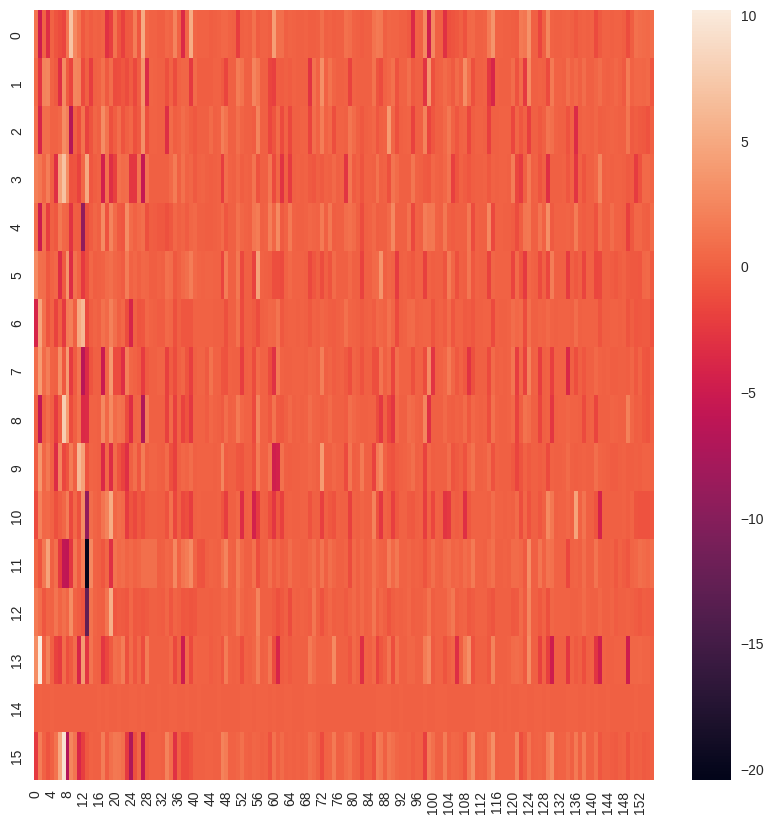

In [ ]:
# Assume 'layer_name' is the name of the layer you're interested in
layer_name = 'layer_1'  

# Get weights of the first layer
weights = model.state_dict()[layer_name+'.weight']

# Convert weights to a numpy array
weights = weights.cpu().numpy()

# Use seaborn to plot a heatmap of the weights
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(weights)
plt.show()

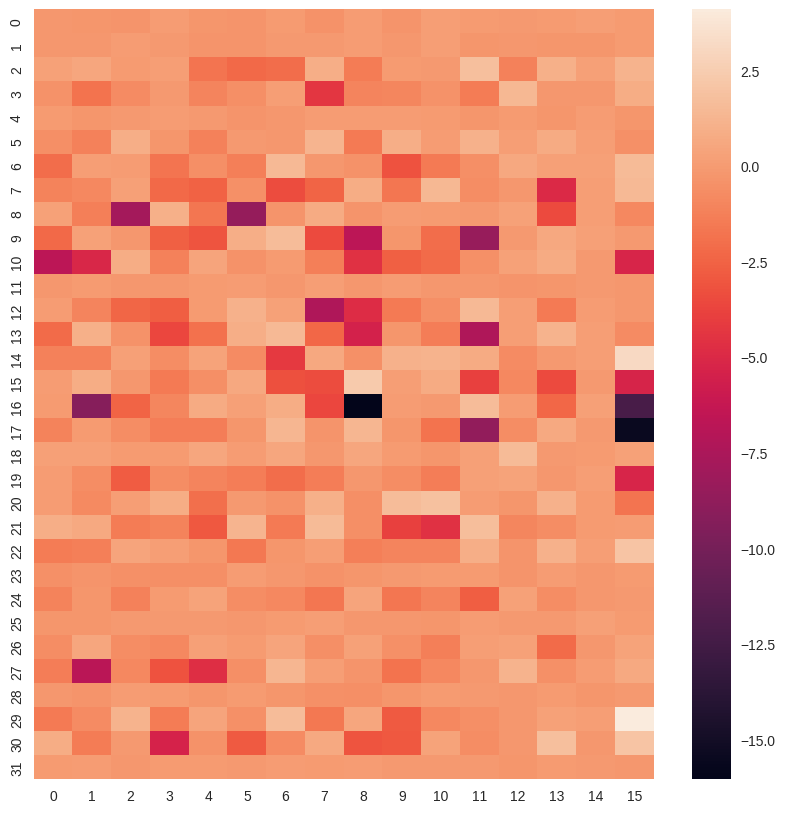

In [ ]:
# Assume 'layer_name' is the name of the layer you're interested in
layer_name = 'layer_2'  

# Get weights of the first layer
weights = model.state_dict()[layer_name+'.weight']

# Convert weights to a numpy array
weights = weights.cpu().numpy()

# Use seaborn to plot a heatmap of the weights
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(weights)
plt.show()

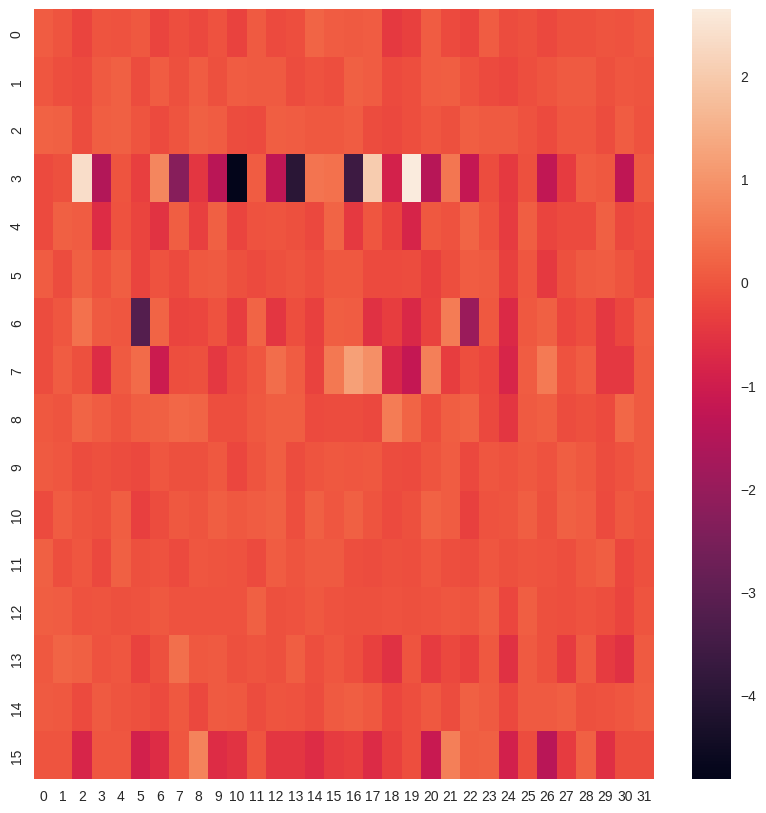

In [ ]:
# Assume 'layer_name' is the name of the layer you're interested in
layer_name = 'layer_3'  

# Get weights of the first layer
weights = model.state_dict()[layer_name+'.weight']

# Convert weights to a numpy array
weights = weights.cpu().numpy()

# Use seaborn to plot a heatmap of the weights
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(weights)
plt.show()

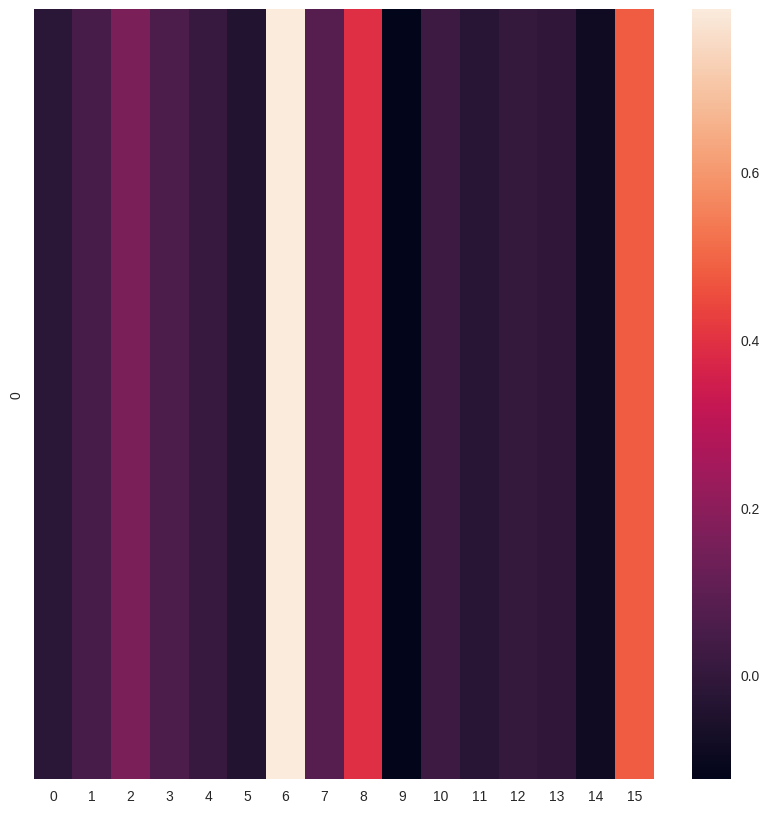

In [ ]:
# Assume 'layer_name' is the name of the layer you're interested in
layer_name = 'layer_out'  

# Get weights of the first layer
weights = model.state_dict()[layer_name+'.weight']

# Convert weights to a numpy array
weights = weights.cpu().numpy()

# Use seaborn to plot a heatmap of the weights
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(weights)
plt.show()

#Challenger Model: Super Deep NN, OneCycleLR volatile range, Large Batch, Early stopping due to colab errors

In [ ]:
#bigboi
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# Define predictors and target
X = df.drop('price', axis=1)
y = np.log1p(df['price']) # Apply log transformation
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)
class RegressionDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)
train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

In [ ]:
EPOCHS = 150
BATCH_SIZE = 256  # changed batch size to 512
LEARNING_RATE = 0.0001
NUM_FEATURES = len(X.columns)
PATIENCE = 10  # set the patience for early stopping

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)
class MultipleRegression(nn.Module):
    def __init__(self, num_features):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, 128)
        self.layer_2 = nn.Linear(128, 256)
        self.layer_3 = nn.Linear(256, 512)
        self.layer_4 = nn.Linear(512, 1024)
        self.layer_5 = nn.Linear(1024, 2048)
        self.layer_6 = nn.Linear(2048, 4096)  # Extra layer
        self.layer_7 = nn.Linear(4096, 2048)  # Extra layer
        self.layer_8 = nn.Linear(2048, 1024)
        self.layer_9 = nn.Linear(1024, 512)
        self.layer_10 = nn.Linear(512, 256)
        self.layer_11 = nn.Linear(256, 128)
        self.layer_out = nn.Linear(128, 1)  # The output layer
        
        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.relu(self.layer_5(x))
        x = self.relu(self.layer_6(x))
        x = self.relu(self.layer_7(x))
        x = self.relu(self.layer_8(x))
        x = self.relu(self.layer_9(x))
        x = self.relu(self.layer_10(x))
        x = self.relu(self.layer_11(x))
        x = self.layer_out(x)
        return x
    
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.relu(self.layer_5(x))
        x = self.relu(self.layer_6(x))
        x = self.relu(self.layer_7(x))
        x = self.relu(self.layer_8(x))
        x = self.relu(self.layer_9(x))
        x = self.relu(self.layer_10(x))
        x = self.relu(self.layer_11(x))
        x = self.layer_out(x)
        return x
model = MultipleRegression(NUM_FEATURES)
model.to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)  
MAX_LR = 0.9  # This will be the maximum learning rate
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=MAX_LR, steps_per_epoch=len(train_loader), epochs=EPOCHS)


In [ ]:
loss_stats = {
    'train': [],
    "val": []
}

# Define early stopping parameters
early_stopping_patience = 10
epochs_no_improve = 0
min_val_loss = np.inf

print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()
        scheduler.step()    # Step the scheduler
        
        train_epoch_loss += train_loss.item()
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

    # Early stopping
    if val_epoch_loss < min_val_loss:
        epochs_no_improve = 0
        min_val_loss = val_epoch_loss
    else:
        epochs_no_improve += 1
        if epochs_no_improve == early_stopping_patience:
            print("Early stopping!")
            break


Begin training.


  0%|          | 0/150 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.39103 | Val Loss: 0.32830
Epoch 002: | Train Loss: 0.32474 | Val Loss: 0.32526
Epoch 003: | Train Loss: 0.32484 | Val Loss: 0.32681
Epoch 004: | Train Loss: 0.32493 | Val Loss: 0.32696
Epoch 005: | Train Loss: 0.32529 | Val Loss: 0.32555
Epoch 006: | Train Loss: 0.32533 | Val Loss: 0.32521
Epoch 007: | Train Loss: 0.32583 | Val Loss: 0.32573
Epoch 008: | Train Loss: 0.32591 | Val Loss: 0.33177
Epoch 009: | Train Loss: 0.32615 | Val Loss: 0.32516
Epoch 010: | Train Loss: 0.32648 | Val Loss: 0.32512
Epoch 011: | Train Loss: 0.32722 | Val Loss: 0.32515
Epoch 012: | Train Loss: 0.32757 | Val Loss: 0.33049
Epoch 013: | Train Loss: 0.32782 | Val Loss: 0.32766
Epoch 014: | Train Loss: 0.32738 | Val Loss: 0.33021
Epoch 015: | Train Loss: 0.32805 | Val Loss: 0.32627
Epoch 016: | Train Loss: 0.32920 | Val Loss: 0.32722
Epoch 017: | Train Loss: 0.32887 | Val Loss: 0.33222
Epoch 018: | Train Loss: 0.32910 | Val Loss: 0.32515
Epoch 019: | Train Loss: 0.32995 | Val Loss: 0

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

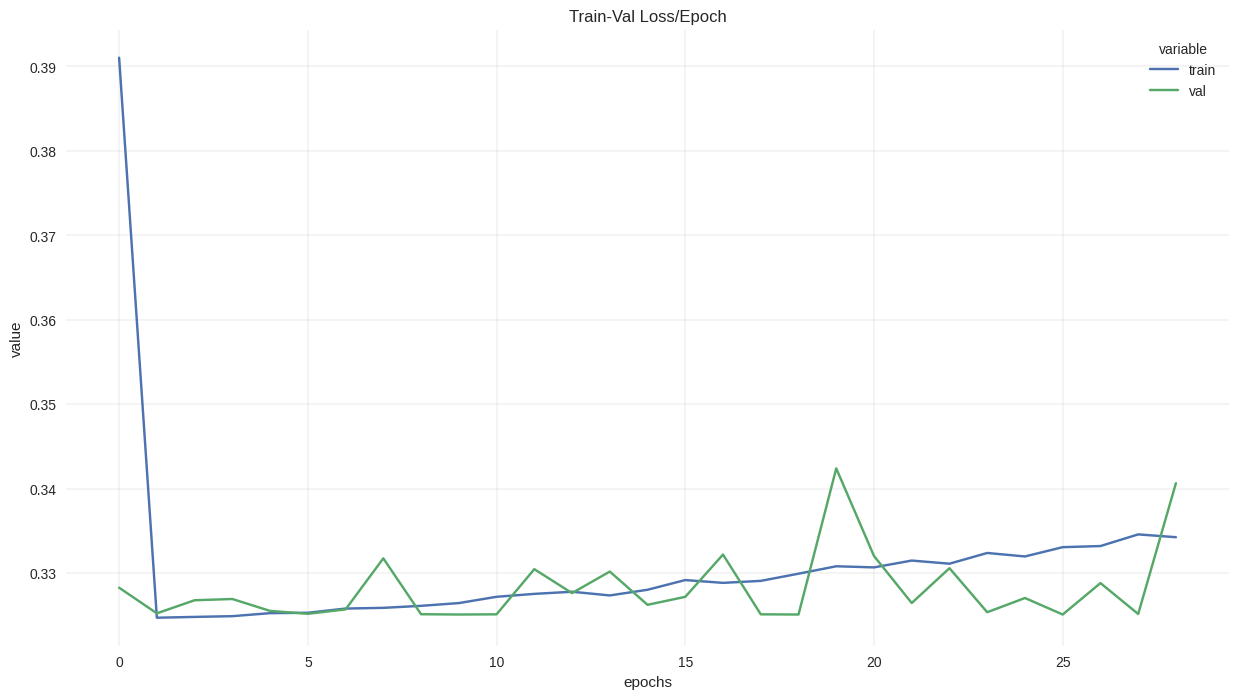

In [ ]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('white')  # Change background to white
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
rmse = np.sqrt(mse)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)
print("RMSE :",rmse)

Mean Squared Error : 0.33962692206370093
R^2 : -0.0483862149546348
RMSE : 0.582775189986414


In [ ]:
# First, let's calculate validation loss with original (non-shuffled) data.
feature_names = X.columns

model.eval()
with torch.no_grad():
    original_data = torch.from_numpy(X_val).float().to(device)
    original_output = model(original_data)
    original_loss = mean_squared_error(y_val, original_output.cpu().numpy())

# Let's store the feature importances in a dictionary
importances = {}

for i in range(X_val.shape[1]):  # iterate over features
    shuffled_X_val = X_val.copy()
    np.random.shuffle(shuffled_X_val[:, i])  # shuffle one feature

    # Calculate validation loss with shuffled data
    with torch.no_grad():
        shuffled_data = torch.from_numpy(shuffled_X_val).float().to(device)
        shuffled_output = model(shuffled_data)
        shuffled_loss = mean_squared_error(y_val, shuffled_output.cpu().numpy())

    # Importance is the increase in loss
    importances[feature_names[i]] = shuffled_loss - original_loss

# Now, let's print out the importances
for i in sorted(importances, key=importances.get, reverse=True):
    print(f'Feature {i} has importance {importances[i]}')

Feature back_legroom has importance 0.0
Feature city_fuel_economy has importance 0.0
Feature daysonmarket has importance 0.0
Feature engine_displacement has importance 0.0
Feature franchise_dealer has importance 0.0
Feature front_legroom has importance 0.0
Feature fuel_tank_volume has importance 0.0
Feature height has importance 0.0
Feature highway_fuel_economy has importance 0.0
Feature horsepower has importance 0.0
Feature is_new has importance 0.0
Feature length has importance 0.0
Feature maximum_seating has importance 0.0
Feature mileage has importance 0.0
Feature savings_amount has importance 0.0
Feature seller_rating has importance 0.0
Feature sp_id has importance 0.0
Feature wheelbase has importance 0.0
Feature width has importance 0.0
Feature year has importance 0.0
Feature body_type_Convertible has importance 0.0
Feature body_type_Coupe has importance 0.0
Feature body_type_Hatchback has importance 0.0
Feature body_type_Minivan has importance 0.0
Feature body_type_Pickup Truck 

In [ ]:
# Sort importances
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Get top 20
top_20_importances = sorted_importances[:20]

# Get feature names and importance values separately
top_features = [item[0] for item in top_20_importances]
top_importance_values = [item[1] for item in top_20_importances]

# Reverse the lists for correct plot display
top_features = top_features[::-1]
top_importance_values = top_importance_values[::-1]

# Plot feature importance
plt.figure(figsize=(10, 10))  # Adjust the size of the plot
plt.title('Feature Importances', size=20)  # Increase the title font size
plt.barh(range(len(top_features)), top_importance_values, color=sns.color_palette("Blues", len(top_features)), align='center')
plt.yticks(range(len(top_features)), top_features, fontsize=10)  # Reduce the font size of the y-axis labels
plt.xlabel('Relative Importance', size=12)  # Reduce the font size of the x-axis label
plt.tick_params(axis='x', labelsize=10)  # Adjust the font size of x-axis tick labels
plt.gca().set_facecolor('white')
plt.grid(False)
plt.show()


NameError: ignored

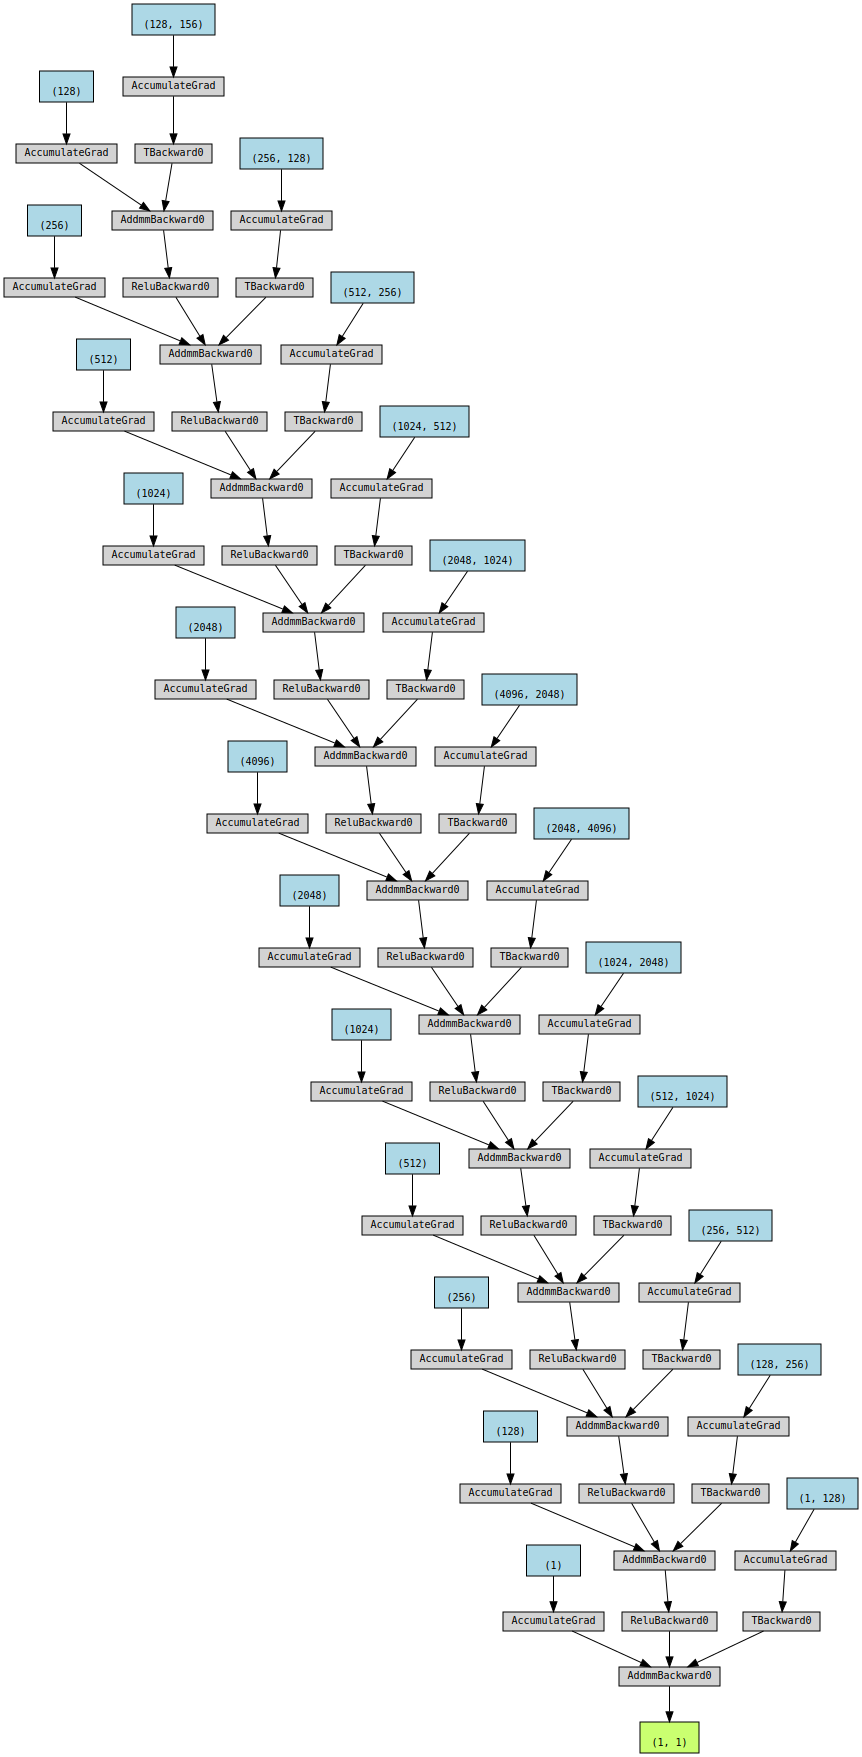

In [ ]:
x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 

In [ ]:
x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 
torch.onnx.export(model, x, "NNChallenger.onnx")

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [ ]:
from google.colab import files

files.download('NNChallenger.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Deep Learner Random Search

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split, ParameterSampler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.distributions import expon, randint

# Define predictors and target
X = df.drop('price', axis=1)
y = np.log1p(df['price']) # Apply log transformation
# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)
y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)

In [ ]:
class RegressionDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    def __len__ (self):
        return len(self.X_data)

class MultipleRegression(nn.Module):
    def __init__(self, num_features, neurons_layer_1, neurons_layer_2, neurons_layer_3, neurons_layer_4):
        super(MultipleRegression, self).__init__()
        self.layer_1 = nn.Linear(num_features, neurons_layer_1)
        self.layer_2 = nn.Linear(neurons_layer_1, neurons_layer_2)
        self.layer_3 = nn.Linear(neurons_layer_2, neurons_layer_3)
        self.layer_4 = nn.Linear(neurons_layer_3, neurons_layer_4)
        self.layer_out = nn.Linear(neurons_layer_4, 1)
        self.relu = nn.ReLU()
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        return x
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
NUM_FEATURES = len(X.columns)
criterion = nn.MSELoss()

In [ ]:
# Hyperparameters
EPOCHS = 150
# Hyperparameter space
hyperparam_space = {
    'learning_rate': expon(0.001, 0.1),
    'batch_size': randint(32, 512),
    'neurons_layer_1': randint(32, 512),
    'neurons_layer_2': randint(32, 512),
    'neurons_layer_3': randint(32, 512),
    'neurons_layer_4': randint(32, 512),
}

# Number of iterations for random search
n_iter = 10
parameter_sampler = ParameterSampler(hyperparam_space, n_iter)

for params in parameter_sampler:
    BATCH_SIZE = params['batch_size']
    LEARNING_RATE = params['learning_rate']
    neurons_layer_1 = params['neurons_layer_1']
    neurons_layer_2 = params['neurons_layer_2']
    neurons_layer_3 = params['neurons_layer_3']
    neurons_layer_4 = params['neurons_layer_4']

    train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
    val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
    test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

    train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=1)
    test_loader = DataLoader(dataset=test_dataset, batch_size=1)

    model = MultipleRegression(NUM_FEATURES, neurons_layer_1, neurons_layer_2, neurons_layer_3, neurons_layer_4)
    model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=EPOCHS)

In [ ]:
loss_stats = {
    'train': [],
    "val": []
}
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))
        
        train_loss.backward()
        optimizer.step()
        scheduler.step()    # Step the scheduler
        
        train_epoch_loss += train_loss.item()
        
    # Rest of your code remains the same...
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))
            
            val_epoch_loss += val_loss.item()
            
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')



Begin training.


  0%|          | 0/150 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.22342 | Val Loss: 0.02199
Epoch 002: | Train Loss: 0.02095 | Val Loss: 0.01940
Epoch 003: | Train Loss: 0.01962 | Val Loss: 0.02034
Epoch 004: | Train Loss: 0.01903 | Val Loss: 0.02053
Epoch 005: | Train Loss: 0.01851 | Val Loss: 0.01801
Epoch 006: | Train Loss: 0.01818 | Val Loss: 0.01737
Epoch 007: | Train Loss: 0.01793 | Val Loss: 0.02135
Epoch 008: | Train Loss: 0.01776 | Val Loss: 0.01711
Epoch 009: | Train Loss: 0.01754 | Val Loss: 0.01677
Epoch 010: | Train Loss: 0.01728 | Val Loss: 0.01726
Epoch 011: | Train Loss: 0.01723 | Val Loss: 0.01661
Epoch 012: | Train Loss: 0.01709 | Val Loss: 0.01630
Epoch 013: | Train Loss: 0.01704 | Val Loss: 0.01676
Epoch 014: | Train Loss: 0.01682 | Val Loss: 0.01619
Epoch 015: | Train Loss: 0.01660 | Val Loss: 0.01611
Epoch 016: | Train Loss: 0.01643 | Val Loss: 0.01594
Epoch 017: | Train Loss: 0.01636 | Val Loss: 0.01566
Epoch 018: | Train Loss: 0.01629 | Val Loss: 0.01610
Epoch 019: | Train Loss: 0.01617 | Val Loss: 0

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

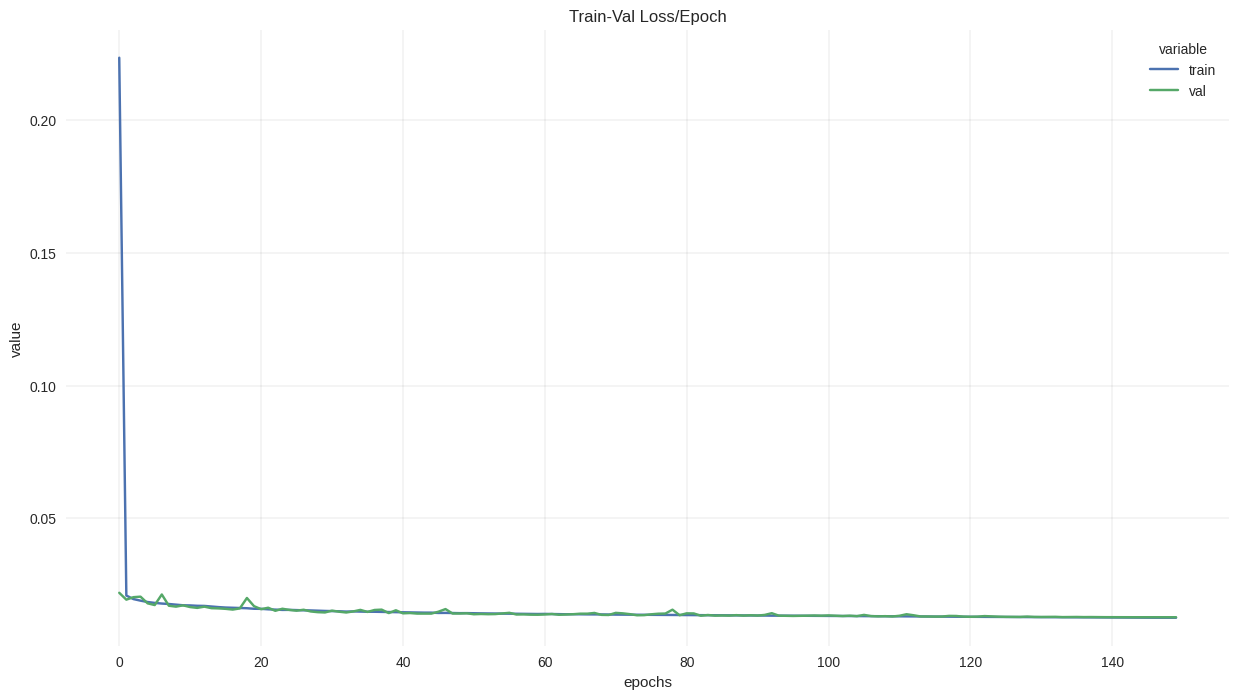

In [ ]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('white')  # Change background to white
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]


In [ ]:
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
rmse = np.sqrt(mse)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)
print("RMSE :",rmse)

Mean Squared Error : 0.012709852494375338
R^2 : 0.9607662606125476
RMSE : 0.11273798159615657


In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=04b285710d79475c7521e6b2cb1dc5ac802080c593ba7cb9f079d3ede3e3dfe5
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


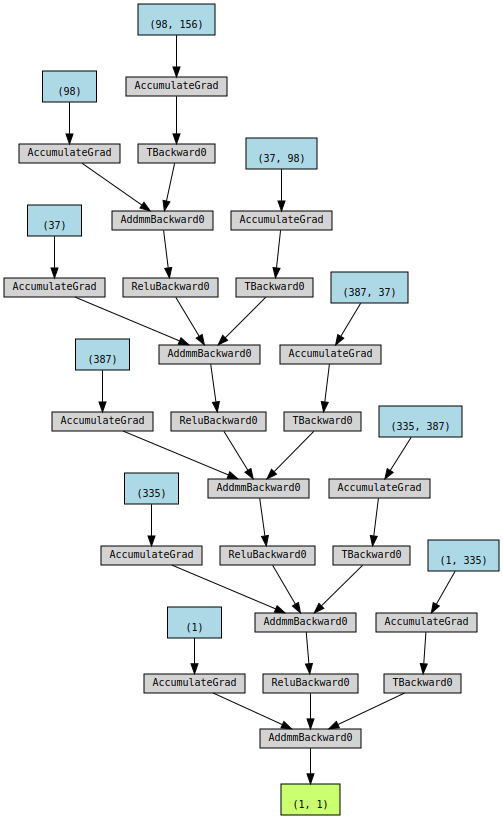

In [ ]:
from torchviz import make_dot
x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 

In [ ]:
!pip install onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 88.6 MB/s eta 0:00:00


In [ ]:
x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 
torch.onnx.export(model, x, "NNRSFinal.onnx")
from google.colab import files

files.download('NNRSFinal.onnx')

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# First, let's calculate validation loss with original (non-shuffled) data.
feature_names = X.columns

model.eval()
with torch.no_grad():
    original_data = torch.from_numpy(X_val).float().to(device)
    original_output = model(original_data)
    original_loss = mean_squared_error(y_val, original_output.cpu().numpy())

# Let's store the feature importances in a dictionary
importances = {}

for i in range(X_val.shape[1]):  # iterate over features
    shuffled_X_val = X_val.copy()
    np.random.shuffle(shuffled_X_val[:, i])  # shuffle one feature

    # Calculate validation loss with shuffled data
    with torch.no_grad():
        shuffled_data = torch.from_numpy(shuffled_X_val).float().to(device)
        shuffled_output = model(shuffled_data)
        shuffled_loss = mean_squared_error(y_val, shuffled_output.cpu().numpy())

    # Importance is the increase in loss
    importances[feature_names[i]] = shuffled_loss - original_loss

# Now, let's print out the importances
for i in sorted(importances, key=importances.get, reverse=True):
    print(f'Feature {i} has importance {importances[i]}')

Feature year has importance 0.08532638654176637
Feature horsepower has importance 0.07725341593557715
Feature mileage has importance 0.0494402482137932
Feature body_type_Pickup Truck has importance 0.04758803611276534
Feature is_new has importance 0.03154468725107557
Feature body_type_Sedan has importance 0.031542106591002456
Feature make_name_Ford has importance 0.030245671187000417
Feature body_type_SUV / Crossover has importance 0.030059839185631147
Feature fuel_type_Gasoline has importance 0.02574040234928937
Feature height has importance 0.023468838425881926
Feature wheelbase has importance 0.016894692219459148
Feature length has importance 0.016546879688722513
Feature make_name_Chevrolet has importance 0.01461189824493584
Feature make_name_Dodge has importance 0.01248543764467129
Feature wheel_system_FWD has importance 0.012458768329100044
Feature fuel_type_Flex Fuel Vehicle has importance 0.012221945806276998
Feature maximum_seating has importance 0.010547999660871783
Feature bo

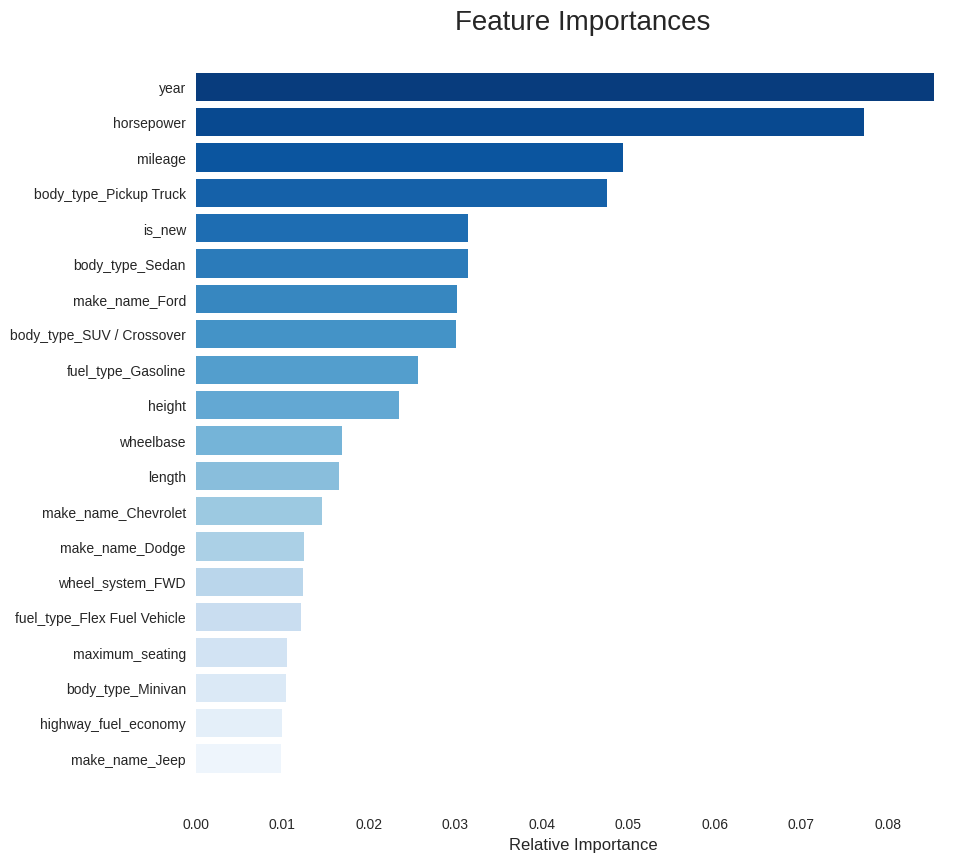

In [ ]:
# Sort importances
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Get top 20
top_20_importances = sorted_importances[:20]

# Get feature names and importance values separately
top_features = [item[0] for item in top_20_importances]
top_importance_values = [item[1] for item in top_20_importances]

# Reverse the lists for correct plot display
top_features = top_features[::-1]
top_importance_values = top_importance_values[::-1]

# Plot feature importance
plt.figure(figsize=(10, 10))  # Adjust the size of the plot
plt.title('Feature Importances', size=20)  # Increase the title font size
plt.barh(range(len(top_features)), top_importance_values, color=sns.color_palette("Blues", len(top_features)), align='center')
plt.yticks(range(len(top_features)), top_features, fontsize=10)  # Reduce the font size of the y-axis labels
plt.xlabel('Relative Importance', size=12)  # Reduce the font size of the x-axis label
plt.tick_params(axis='x', labelsize=10)  # Adjust the font size of x-axis tick labels
plt.gca().set_facecolor('white')
plt.grid(False)
plt.show()


#Random search attempt 2

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import ParameterSampler
from scipy.stats.distributions import randint, expon

# Define predictors and target
X = df.drop('price', axis=1)
y = np.log1p(df['price']) # Apply log transformation

# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)

class RegressionDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)

class MultipleRegression(nn.Module):
    def __init__(self, num_features, neurons_layer_1, neurons_layer_2, neurons_layer_3, neurons_layer_4):
        super(MultipleRegression, self).__init__()
        
        self.layer_1 = nn.Linear(num_features, neurons_layer_1)
        self.layer_2 = nn.Linear(neurons_layer_1, neurons_layer_2)
        self.layer_3 = nn.Linear(neurons_layer_2, neurons_layer_3)
        self.layer_4 = nn.Linear(neurons_layer_3, neurons_layer_4)
        self.layer_out = nn.Linear(neurons_layer_4, 1)
        
        self.relu = nn.ReLU()
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
criterion = nn.MSELoss()

# Hyperparameters
EPOCHS = 150
NUM_FEATURES = len(X.columns)
# Hyperparameter space
hyperparam_space = {
    'learning_rate': expon(0.001, 0.1),
    'batch_size': randint(32, 512),
    'neurons_layer_1': randint(32, 512),
    'neurons_layer_2': randint(32, 512),
    'neurons_layer_3': randint(32, 512),
    'neurons_layer_4': randint(32, 512),
}

# Number of iterations for random search
n_iter = 10
parameter_sampler = ParameterSampler(hyperparam_space, n_iter)

best_val_loss = np.inf
best_params = None

for params in parameter_sampler:
    BATCH_SIZE = params['batch_size']
    LEARNING_RATE = params['learning_rate']
    neurons_layer_1 = params['neurons_layer_1']
    neurons_layer_2 = params['neurons_layer_2']
    neurons_layer_3 = params['neurons_layer_3']
    neurons_layer_4 = params['neurons_layer_4']

    train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
    val_dataset = RegressionDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).float())
    test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

    train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(dataset=val_dataset, batch_size=1)
    test_loader = DataLoader(dataset=test_dataset, batch_size=1)

    model = MultipleRegression(NUM_FEATURES, neurons_layer_1, neurons_layer_2, neurons_layer_3, neurons_layer_4)
    model.to(device)

    optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(train_loader), epochs=EPOCHS)

    loss_stats = {
        'train': [],
        "val": []
    }

    print(f"Training with parameters: {params}")
    for e in tqdm(range(1, EPOCHS+1)):

        # TRAINING
        train_epoch_loss = 0
        model.train()
        for X_train_batch, y_train_batch in train_loader:
            X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
            optimizer.zero_grad()

            y_train_pred = model(X_train_batch)

            train_loss = criterion(y_train_pred, y_train_batch.unsqueeze(1))

            train_loss.backward()
            optimizer.step()
            scheduler.step()    # Step the scheduler

            train_epoch_loss += train_loss.item()

        # VALIDATION    
        with torch.no_grad():

            val_epoch_loss = 0

            model.eval()
            for X_val_batch, y_val_batch in val_loader:
                X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)

                y_val_pred = model(X_val_batch)

                val_loss = criterion(y_val_pred, y_val_batch.unsqueeze(1))

                val_epoch_loss += val_loss.item()

        loss_stats['train'].append(train_epoch_loss/len(train_loader))
        loss_stats['val'].append(val_epoch_loss/len(val_loader))                              

        print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f}')

    if np.min(loss_stats['val']) < best_val_loss:
        best_val_loss = np.min(loss_stats['val'])
        best_params = params

print(f"Best parameters: {best_params}")
print(f"Best validation loss: {best_val_loss}")

cuda:0
Training with parameters: {'batch_size': 368, 'learning_rate': 0.010656343659147235, 'neurons_layer_1': 64, 'neurons_layer_2': 294, 'neurons_layer_3': 304, 'neurons_layer_4': 109}


  0%|          | 0/150 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.21796 | Val Loss: 0.02180
Epoch 002: | Train Loss: 0.02119 | Val Loss: 0.01982
Epoch 003: | Train Loss: 0.01988 | Val Loss: 0.01876
Epoch 004: | Train Loss: 0.01914 | Val Loss: 0.01916
Epoch 005: | Train Loss: 0.01853 | Val Loss: 0.01852
Epoch 006: | Train Loss: 0.01809 | Val Loss: 0.01730
Epoch 007: | Train Loss: 0.01761 | Val Loss: 0.01679
Epoch 008: | Train Loss: 0.01746 | Val Loss: 0.01841
Epoch 009: | Train Loss: 0.01729 | Val Loss: 0.01682
Epoch 010: | Train Loss: 0.01698 | Val Loss: 0.01644
Epoch 011: | Train Loss: 0.01681 | Val Loss: 0.01586
Epoch 012: | Train Loss: 0.01657 | Val Loss: 0.01627
Epoch 013: | Train Loss: 0.01654 | Val Loss: 0.01634
Epoch 014: | Train Loss: 0.01643 | Val Loss: 0.02025
Epoch 015: | Train Loss: 0.01634 | Val Loss: 0.01575
Epoch 016: | Train Loss: 0.01619 | Val Loss: 0.01888
Epoch 017: | Train Loss: 0.01607 | Val Loss: 0.01522
Epoch 018: | Train Loss: 0.01582 | Val Loss: 0.01810
Epoch 019: | Train Loss: 0.01569 | Val Loss: 0

  0%|          | 0/150 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.16108 | Val Loss: 0.02279
Epoch 002: | Train Loss: 0.01971 | Val Loss: 0.01991
Epoch 003: | Train Loss: 0.01862 | Val Loss: 0.01844


KeyboardInterrupt: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import ParameterSampler
from scipy.stats.distributions import randint, expon

# Define predictors and target
X = df.drop('price', axis=1)
y = np.log1p(df['price']) # Apply log transformation

# Train - Test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, random_state=21)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

y_train, y_test, y_val = y_train.astype(float), y_test.astype(float), y_val.astype(float)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

class RegressionDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

class CustomRegression(nn.Module):
    def __init__(self, num_features):
        super(CustomRegression, self).__init__()

        self.layer_1 = nn.Linear(num_features, 64)
        self.layer_2 = nn.Linear(64, 294)
        self.layer_3 = nn.Linear(294, 304)
        self.layer_4 = nn.Linear(304, 109)
        self.layer_out = nn.Linear(109, 1)

        self.relu = nn.ReLU()
    
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        return x
    
    def predict(self, test_inputs):
        x = self.relu(self.layer_1(test_inputs))
        x = self.relu(self.layer_2(x))
        x = self.relu(self.layer_3(x))
        x = self.relu(self.layer_4(x))
        x = self.layer_out(x)
        return x

# Your Data Here
# X_train, y_train, X_test, y_test

EPOCHS = 150
BATCH_SIZE = 368
LEARNING_RATE = 0.010656343659147235
NUM_FEATURES = len(X.columns)

train_dataset = RegressionDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).float())
test_dataset = RegressionDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).float())

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = CustomRegression(NUM_FEATURES)
model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

for e in range(1, EPOCHS+1):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        loss.backward()
        optimizer.step()

y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)


Mean Squared Error : 0.018442492778614716
R^2 : 0.9430703105601458


In [1]:
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
plt.figure(figsize=(15,8))
plt.gca().set_facecolor('white')  # Change background to white
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable").set_title('Train-Val Loss/Epoch')

NameError: ignored

In [ ]:
# This assumes the name of your model is 'model' and it is on the correct device (cpu or cuda)

y_pred_list = []
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Turn off gradients for prediction
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_pred_list.append(y_test_pred.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]


In [ ]:
mse = mean_squared_error(y_test, y_pred_list)
r_square = r2_score(y_test, y_pred_list)
rmse = np.sqrt(mse)
print("Mean Squared Error :",mse)
print("R^2 :",r_square)
print("RMSE :",rmse)

Mean Squared Error : 0.01782241815992548
R^2 : 0.9449844040558172
RMSE : 0.13350062981096936


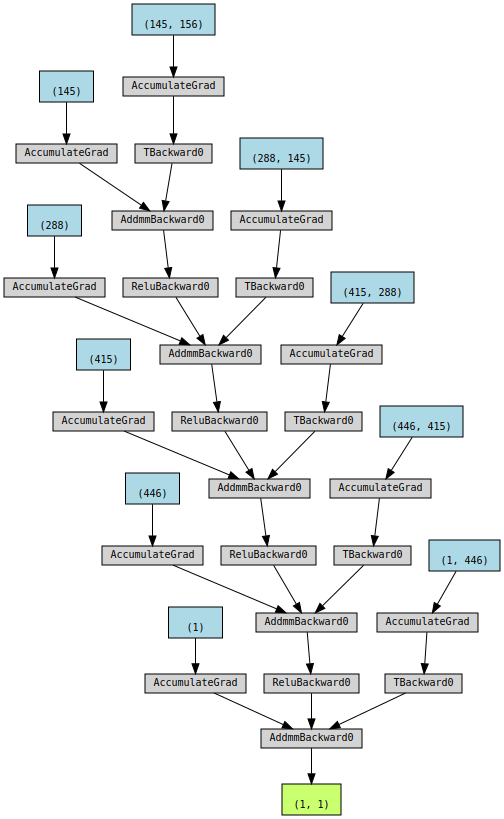

In [ ]:
from torchviz import make_dot
x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 

In [ ]:
x = torch.zeros(1, NUM_FEATURES, dtype=torch.float, requires_grad=False).to(device)
out = model(x)
make_dot(out) 
torch.onnx.export(model, x, "NNTruerandomsearch.onnx")
from google.colab import files

files.download('NNTruerandomsearch.onnx')

============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# First, let's calculate validation loss with original (non-shuffled) data.
feature_names = X.columns

model.eval()
with torch.no_grad():
    original_data = torch.from_numpy(X_val).float().to(device)
    original_output = model(original_data)
    original_loss = mean_squared_error(y_val, original_output.cpu().numpy())

# Let's store the feature importances in a dictionary
importances = {}

for i in range(X_val.shape[1]):  # iterate over features
    shuffled_X_val = X_val.copy()
    np.random.shuffle(shuffled_X_val[:, i])  # shuffle one feature

    # Calculate validation loss with shuffled data
    with torch.no_grad():
        shuffled_data = torch.from_numpy(shuffled_X_val).float().to(device)
        shuffled_output = model(shuffled_data)
        shuffled_loss = mean_squared_error(y_val, shuffled_output.cpu().numpy())

    # Importance is the increase in loss
    importances[feature_names[i]] = shuffled_loss - original_loss

# Now, let's print out the importances
for i in sorted(importances, key=importances.get, reverse=True):
    print(f'Feature {i} has importance {importances[i]}')

Feature year has importance 0.09212433105550541
Feature horsepower has importance 0.06153810905997941
Feature mileage has importance 0.055199688339739254
Feature body_type_Pickup Truck has importance 0.033734174759415314
Feature wheel_system_FWD has importance 0.019240727192562056
Feature make_name_Ford has importance 0.019204607912095245
Feature wheelbase has importance 0.016795818318768134
Feature body_type_Sedan has importance 0.01612410442105456
Feature body_type_SUV / Crossover has importance 0.014539830845161396
Feature fuel_type_Gasoline has importance 0.011862744478671305
Feature is_new has importance 0.01148566247825215
Feature has_accidents_False has importance 0.009870437781961047
Feature height has importance 0.009848521633534443
Feature city_fuel_economy has importance 0.009601562347248304
Feature fuel_type_Flex Fuel Vehicle has importance 0.009582206998326476
Feature make_name_Chevrolet has importance 0.009392149298028955
Feature make_name_Dodge has importance 0.008702498

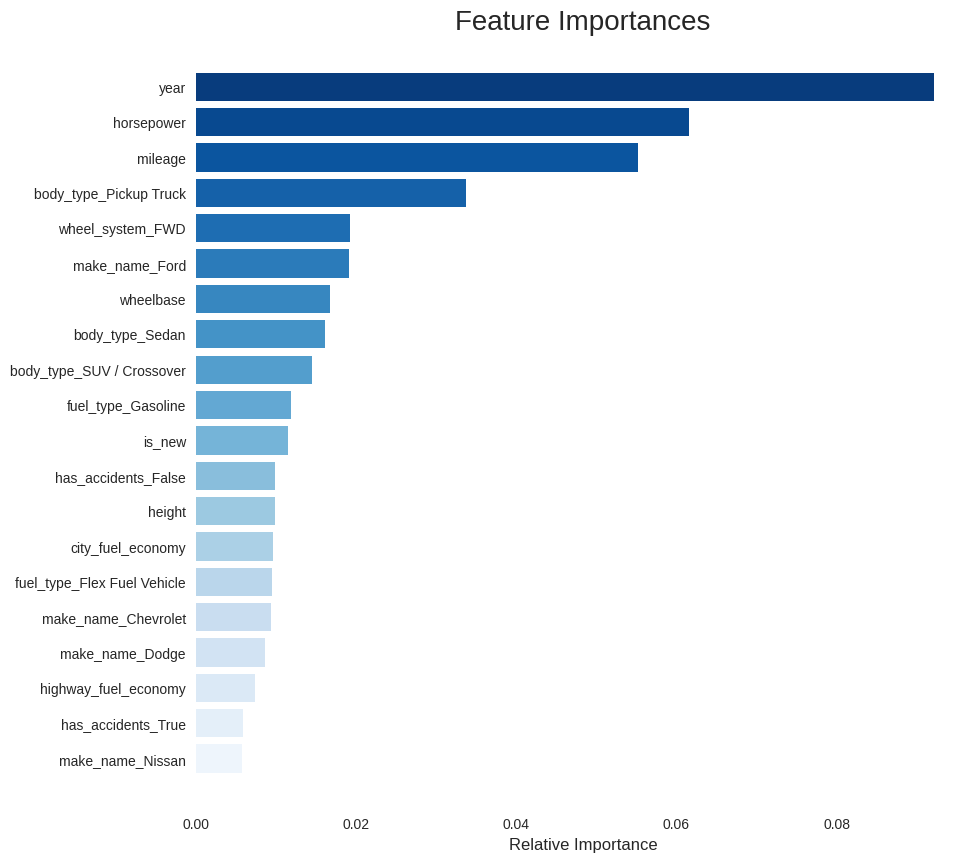

In [ ]:
# Sort importances
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

# Get top 20
top_20_importances = sorted_importances[:20]

# Get feature names and importance values separately
top_features = [item[0] for item in top_20_importances]
top_importance_values = [item[1] for item in top_20_importances]

# Reverse the lists for correct plot display
top_features = top_features[::-1]
top_importance_values = top_importance_values[::-1]

# Plot feature importance
plt.figure(figsize=(10, 10))  # Adjust the size of the plot
plt.title('Feature Importances', size=20)  # Increase the title font size
plt.barh(range(len(top_features)), top_importance_values, color=sns.color_palette("Blues", len(top_features)), align='center')
plt.yticks(range(len(top_features)), top_features, fontsize=10)  # Reduce the font size of the y-axis labels
plt.xlabel('Relative Importance', size=12)  # Reduce the font size of the x-axis label
plt.tick_params(axis='x', labelsize=10)  # Adjust the font size of x-axis tick labels
plt.gca().set_facecolor('white')
plt.grid(False)
plt.show()